In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# dataset
data='SeoulBikeData.csv'

In [ ]:
# dataframe
df = pd.read_csv(data, encoding= 'unicode_escape')

In [ ]:
# Check 1st Five rows
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# Check last 5 rows
df.tail(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [ ]:
# Check Total rows and Columns in dataset.
# Rows= 8760
# Columns=14
print(f' The shape of dataset is {(df.shape)} \n Total Rows are : {(df.shape)[0]}\n Total Columns are : {(df.shape)[1]}')

 The shape of dataset is (8760, 14) 
 Total Rows are : 8760
 Total Columns are : 14


In [ ]:
# Check the info of dataset to know the data types of columns or variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
# Check columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#Since the variables having units with name, renaming columns for better variable analysis.
df.rename(columns={'Rented Bike Count':'Rented_Bike_Count','Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed',
                       'Visibility (10m)':'Visibility','Dew point temperature(°C)':'Dew_point_temperature', 'Solar Radiation (MJ/m2)':'Solar_Radiation',
                        'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Functioning Day':'Functioning_Day'},inplace=True)

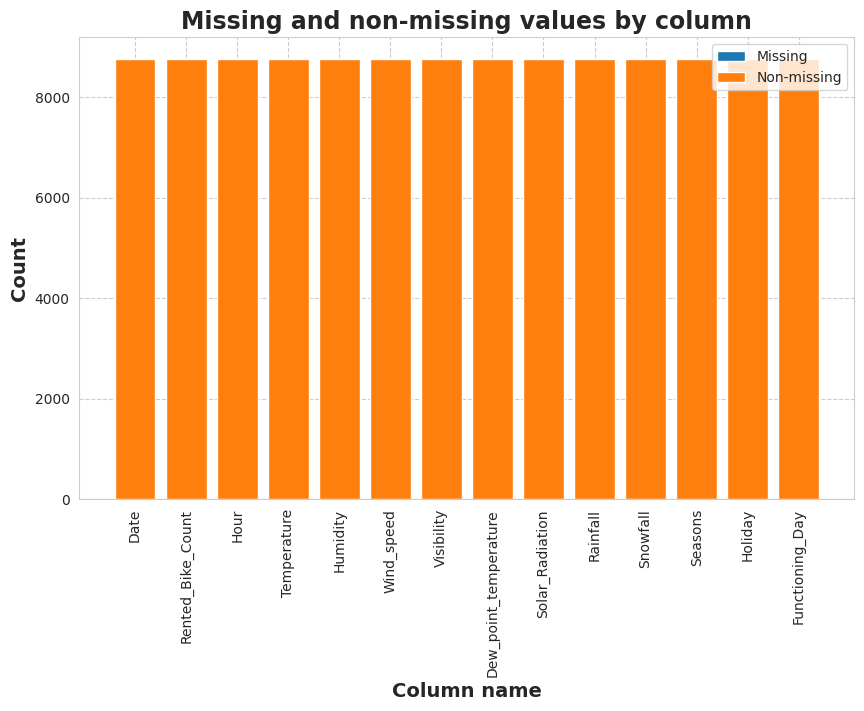

In [ ]:
# Count missing and non-missing values in each column
missing_values_count = df.isnull().sum()
non_missing_values_count = df.notnull().sum()

# Create stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(missing_values_count.index, missing_values_count.values, label='Missing')
plt.bar(non_missing_values_count.index, non_missing_values_count.values, bottom=missing_values_count.values, label='Non-missing')
plt.xticks(rotation=90)
plt.xlabel("Column name", size=14, weight="bold")
plt.ylabel("Count", size=14, weight="bold")
plt.title("Missing and non-missing values by column", fontweight="bold", size=17)
plt.legend()
plt.show()

In [ ]:
# checking Duplicate rows in our BikeData.
duplicates=df.duplicated().sum()
print(f"We have {duplicates} duplicate rows in our Bike Data.")
# No duplicate rows found

We have 0 duplicate rows in our Bike Data.


In [ ]:
df.isna().sum()


Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [ ]:
# Data Description
df.describe().transpose()      

count         mean         std   min     25%      50%  \
Rented_Bike_Count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
Hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
Solar_Radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   

                           75%      max  
Rented_Bike_Count      1065.25  3556.00  
Hour                     17.25    23.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
Wind_speed                2.30     7.40  
Visibility             2000.00  2000.00  
Dew_point_temperature    14.80    27.20  
Solar_Radiation           0.93     3.52  
Rainfall                  0.00    35.00  
Snowfall                  0.00     8.80

In [ ]:
# extracting day,month, day of week and weekdays/weekend from date column

df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)

<Axes: >

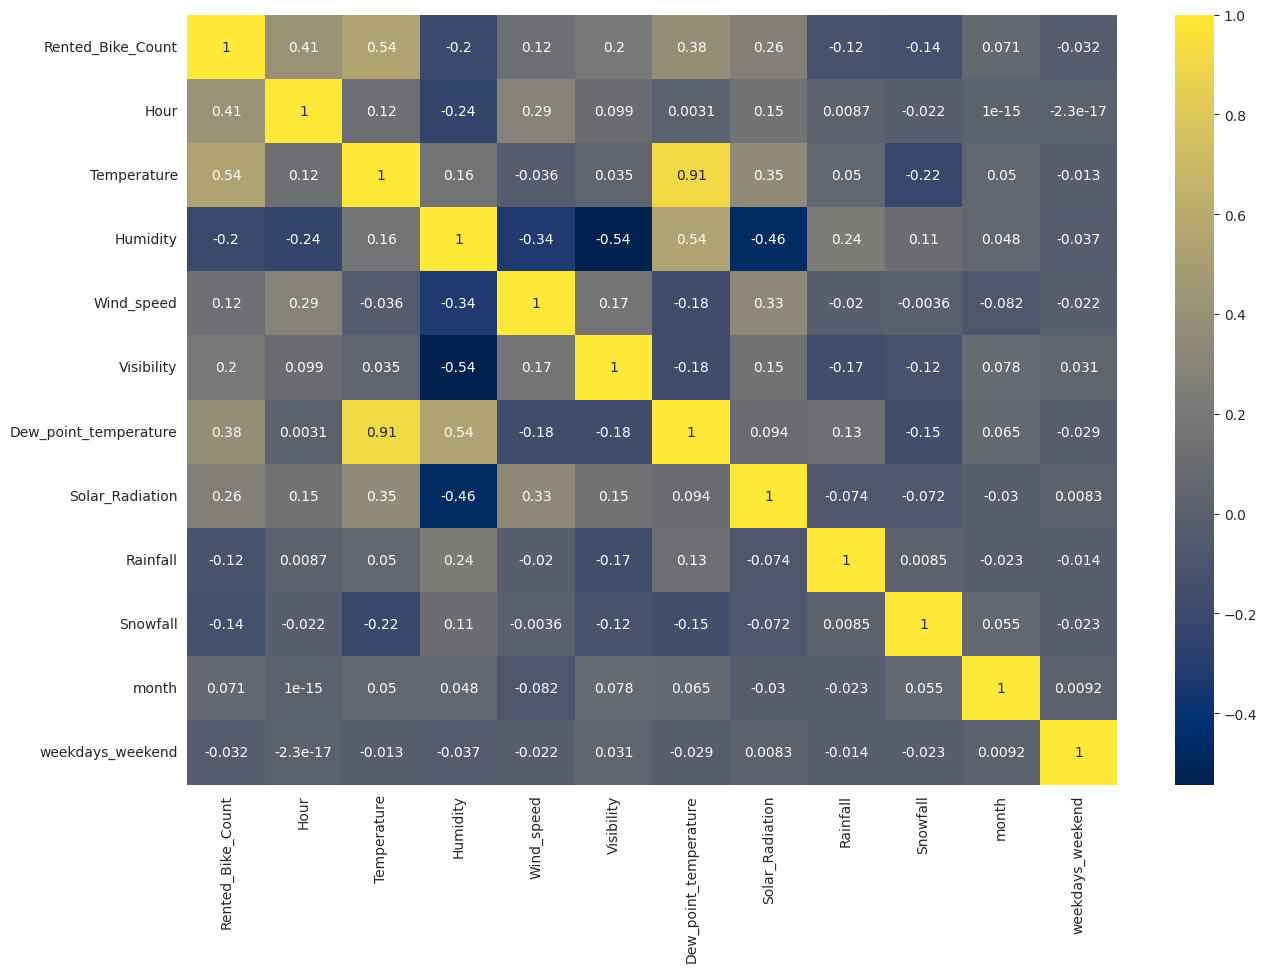

In [ ]:
#checking correlation using heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='cividis',annot=True)

In [ ]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented_Bike_Count','Dew_point_temperature'] ]])

variables       VIF
0              Hour  3.961874
1       Temperature  3.236809
2          Humidity  6.114153
3        Wind_speed  4.616621
4        Visibility  5.404128
5   Solar_Radiation  2.272068
6          Rainfall  1.081252
7          Snowfall  1.125304
8             month  4.580307
9  weekdays_weekend  1.399708

<Axes: xlabel='Rented_Bike_Count', ylabel='Density'>

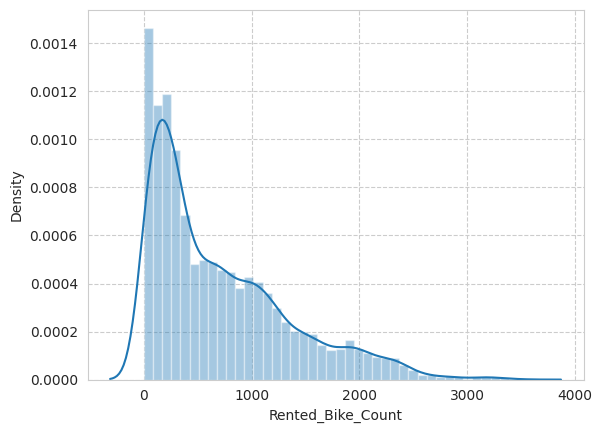

In [ ]:
#visualising distribution

sns.distplot(df['Rented_Bike_Count'])

<Axes: xlabel='Rented_Bike_Count', ylabel='Density'>

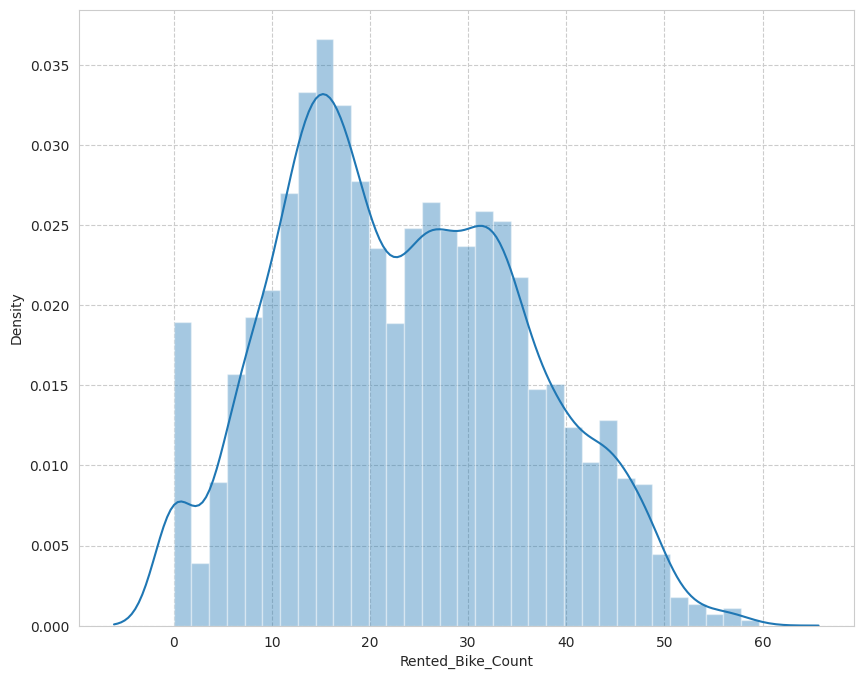

In [ ]:
# square_root transformation

plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(df['Rented_Bike_Count']))

In [ ]:
# Numeric Features

numeric_features= df.select_dtypes(exclude='object')

In [ ]:
# Numeric Features info
numeric_features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  month                  8760 non-null   int64  
 11  weekdays_weekend       8760 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 821.4 KB


In [ ]:
# describing numeric feature

numeric_features.describe().transpose()

count         mean         std   min     25%      50%  \
Rented_Bike_Count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
Hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
Solar_Radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   
month                  8760.0     6.526027    3.448048   1.0    4.00     7.00   
weekdays_weekend       8760.0     0.290411    0.453978   0.0    0.00     0.00   

                           75%      max  
Rented_Bike_Count      1065.25  3556.00  
Hour                     17.25    23.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
Wind_speed                2.30     7.40  
Visibility             2000.00  2000.00  
Dew_point_temperature    14.80    27.20  
Solar_Radiation           0.93     3.52  
Rainfall                  0.00    35.00  
Snowfall                  0.00     8.80  
month                    10.00    12.00  
weekdays_weekend          1.00     1.00

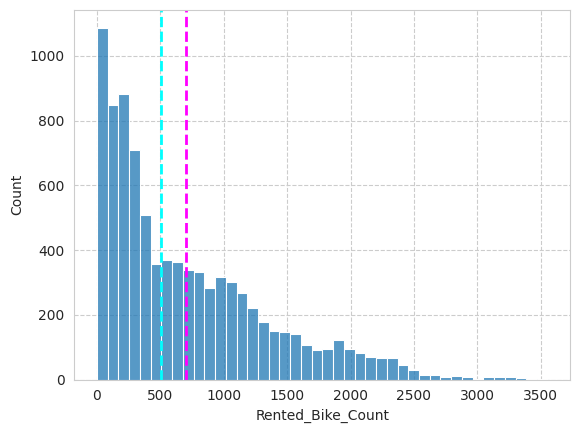

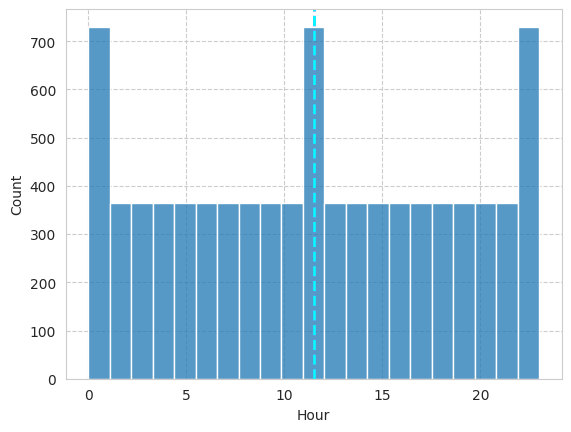

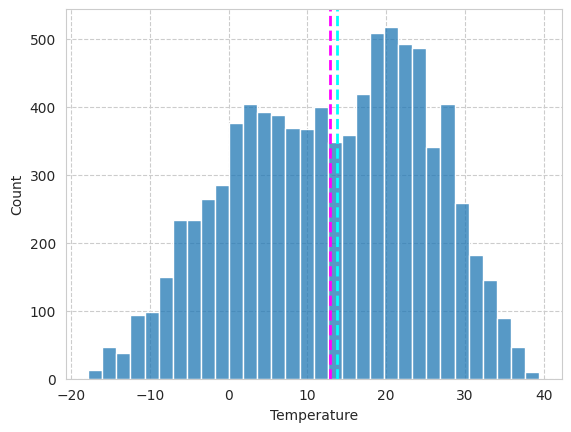

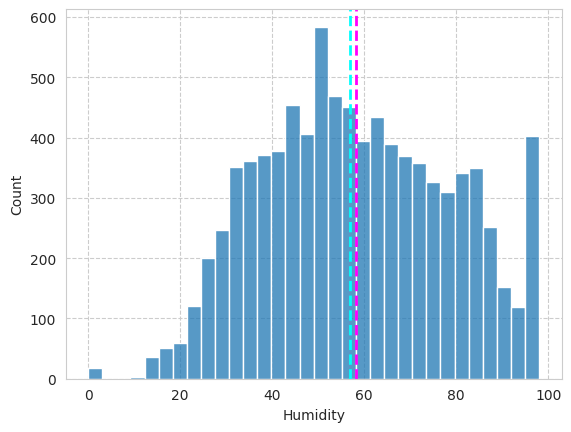

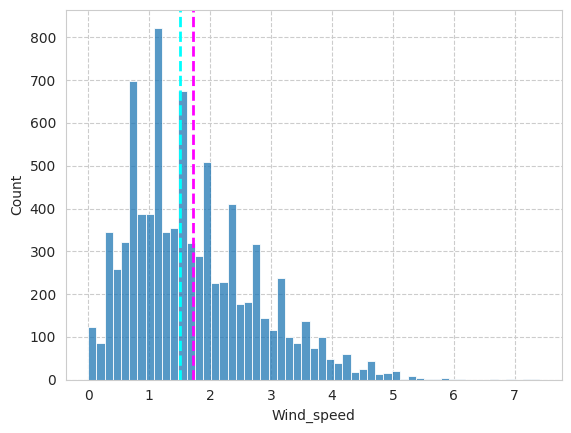

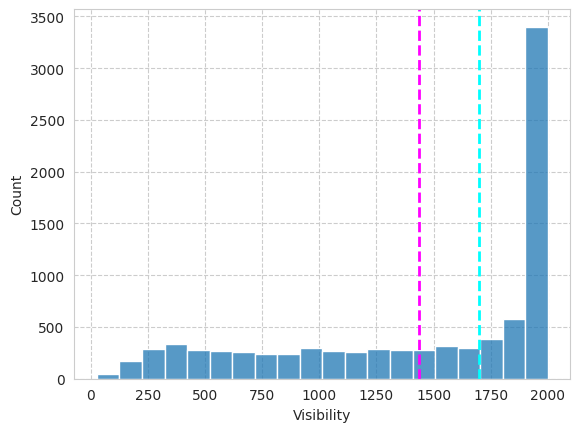

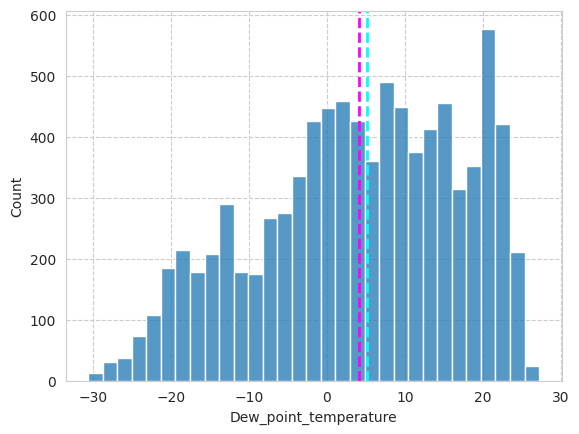

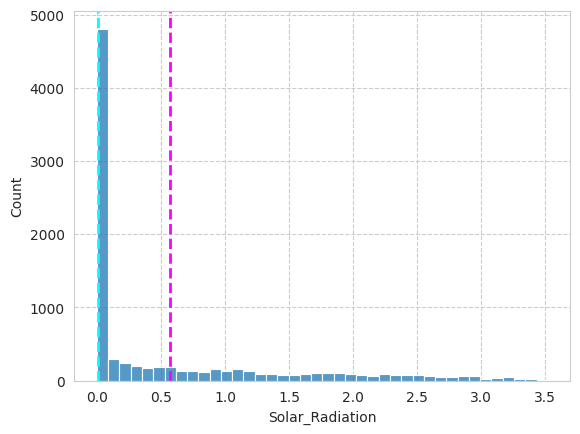

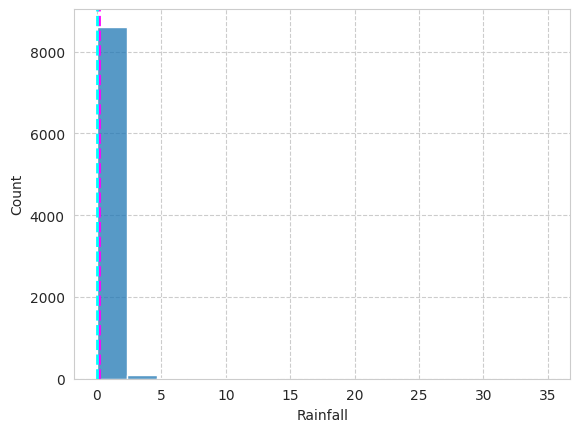

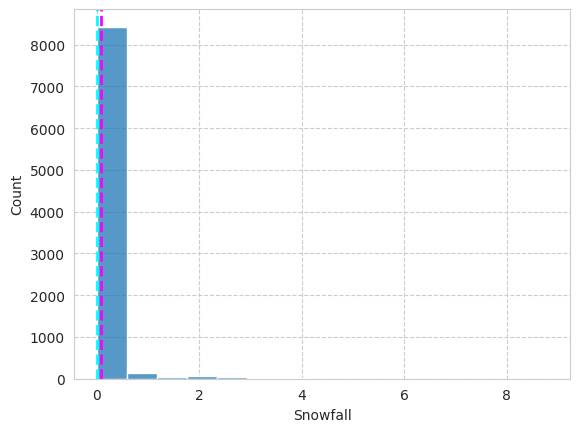

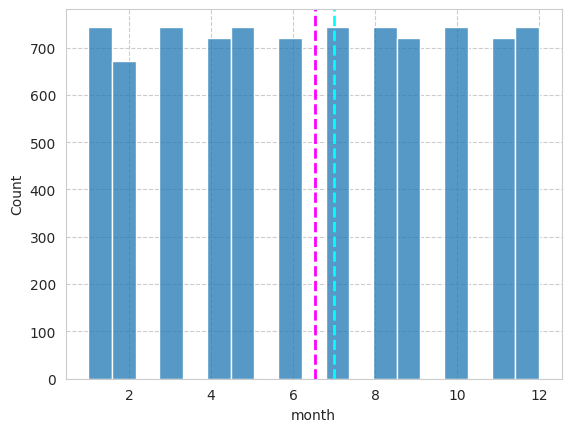

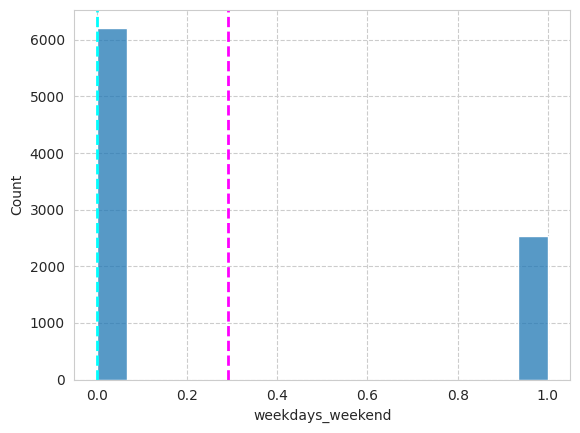

In [ ]:
#plotting histogram

for col in numeric_features[:]:
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

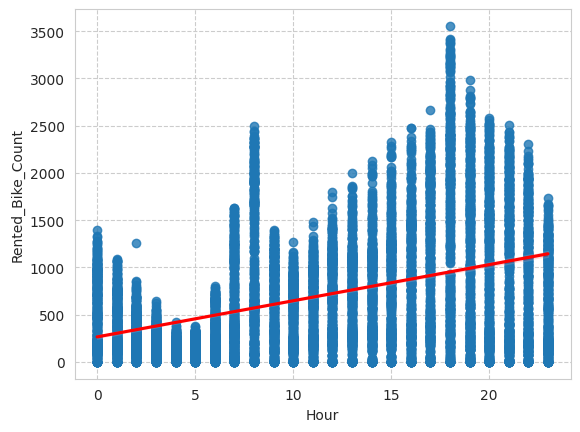

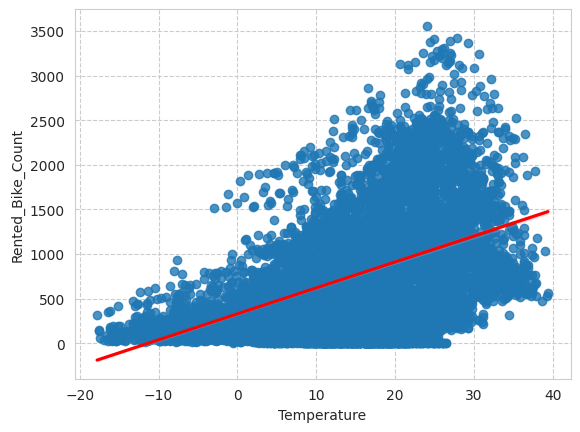

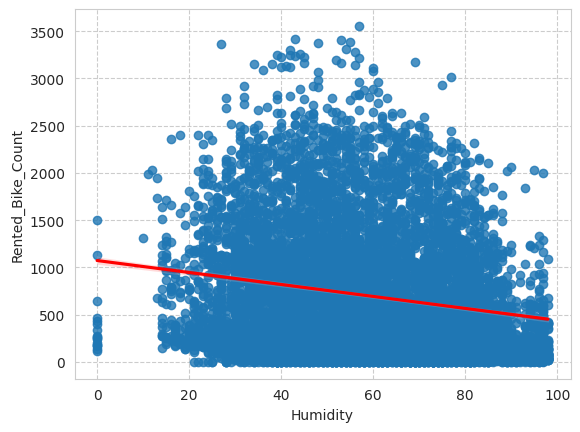

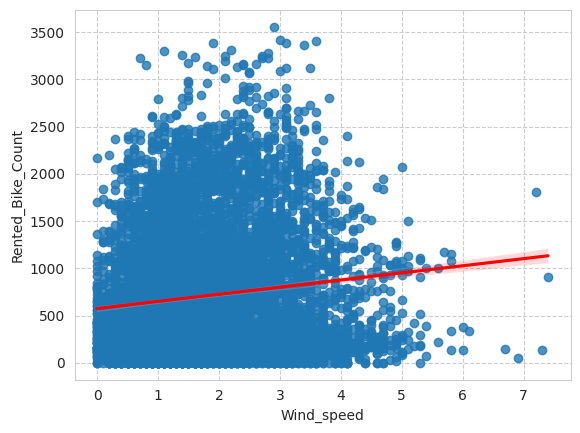

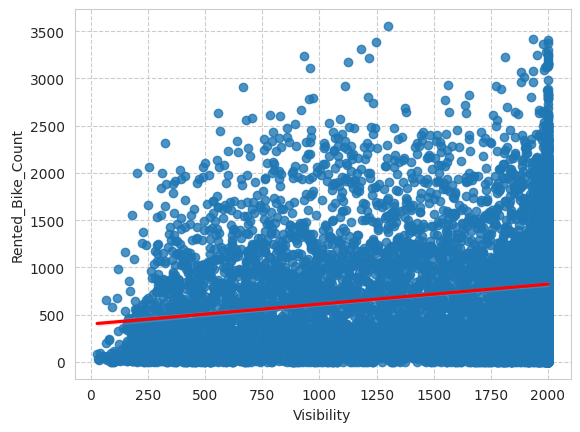

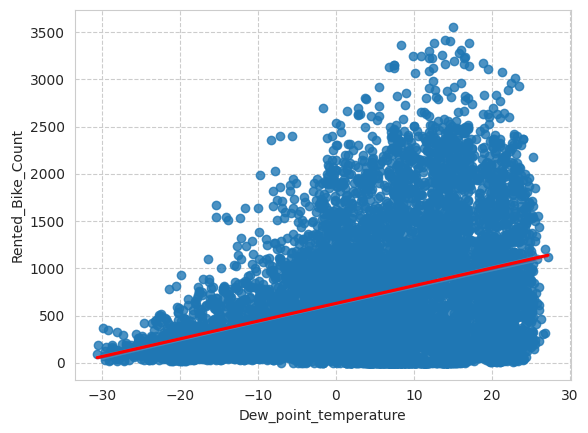

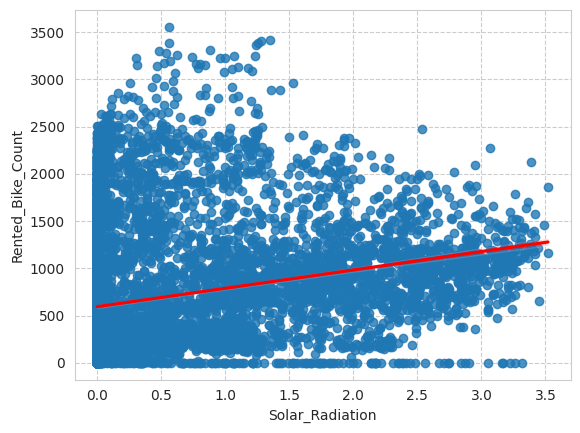

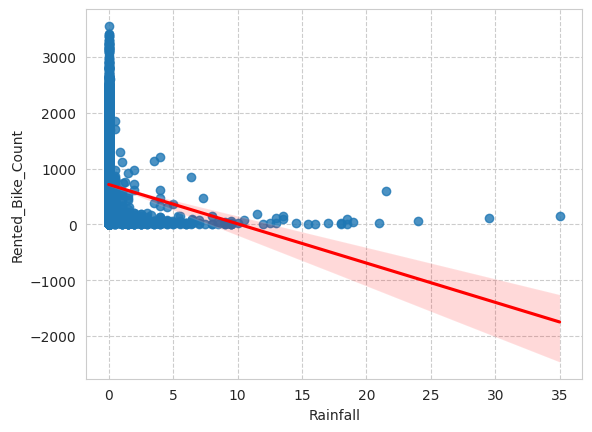

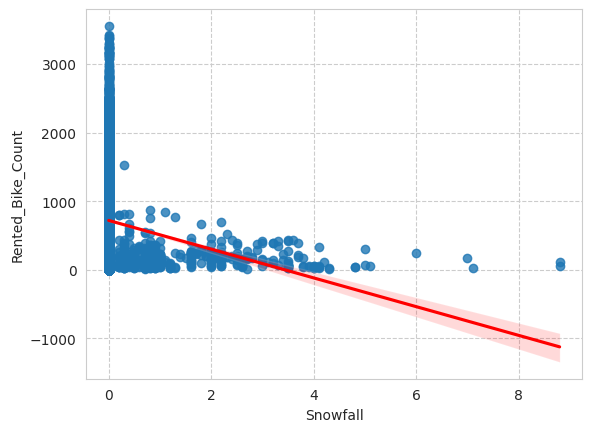

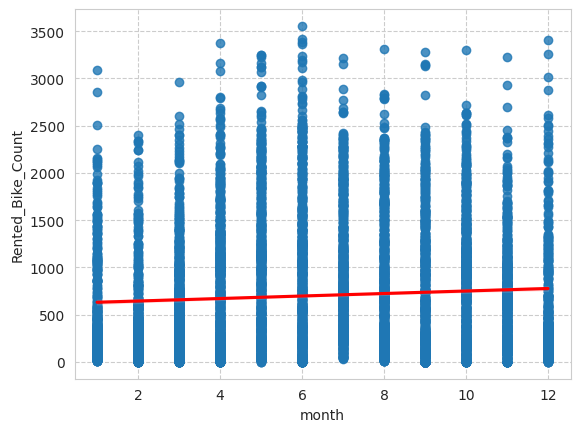

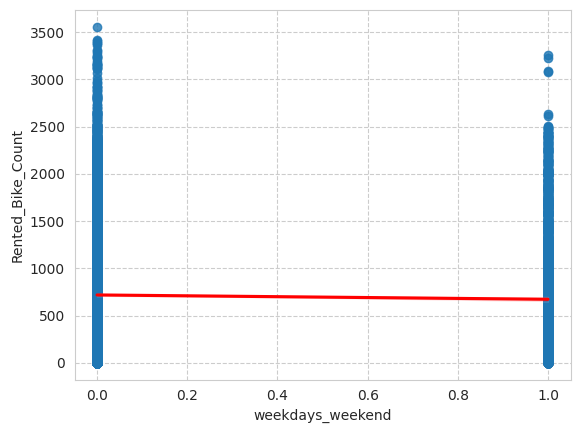

In [ ]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in numeric_features[:]:
  if col == 'Rented_Bike_Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented_Bike_Count"],line_kws={"color": "red"})
  
  plt.show()

In [ ]:
#Extracting categorical features
categorical_features= df.select_dtypes(include='object')

In [ ]:
categorical_features

Seasons     Holiday Functioning_Day
0     Winter  No Holiday             Yes
1     Winter  No Holiday             Yes
2     Winter  No Holiday             Yes
3     Winter  No Holiday             Yes
4     Winter  No Holiday             Yes
...      ...         ...             ...
8755  Autumn  No Holiday             Yes
8756  Autumn  No Holiday             Yes
8757  Autumn  No Holiday             Yes
8758  Autumn  No Holiday             Yes
8759  Autumn  No Holiday             Yes

[8760 rows x 3 columns]

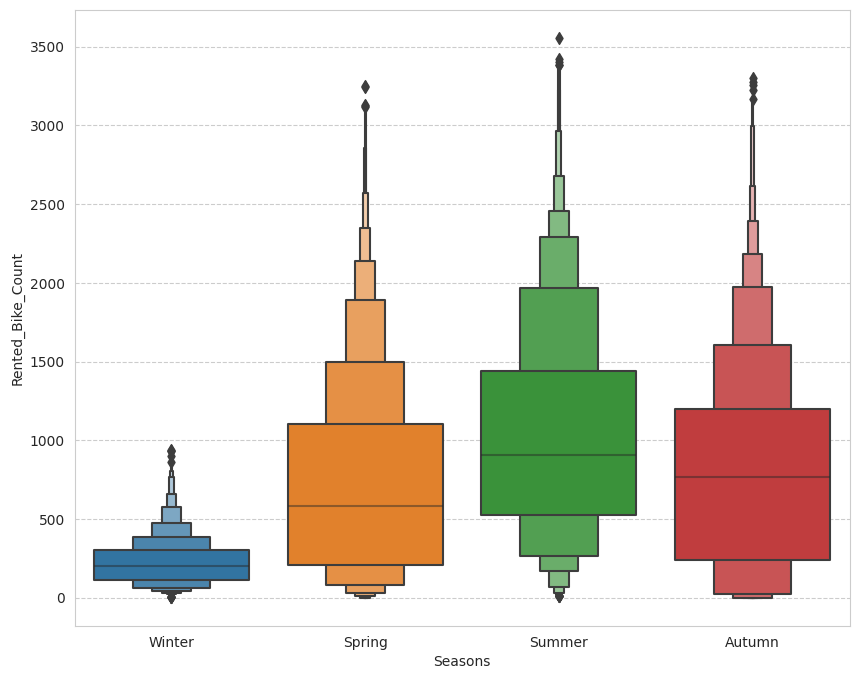

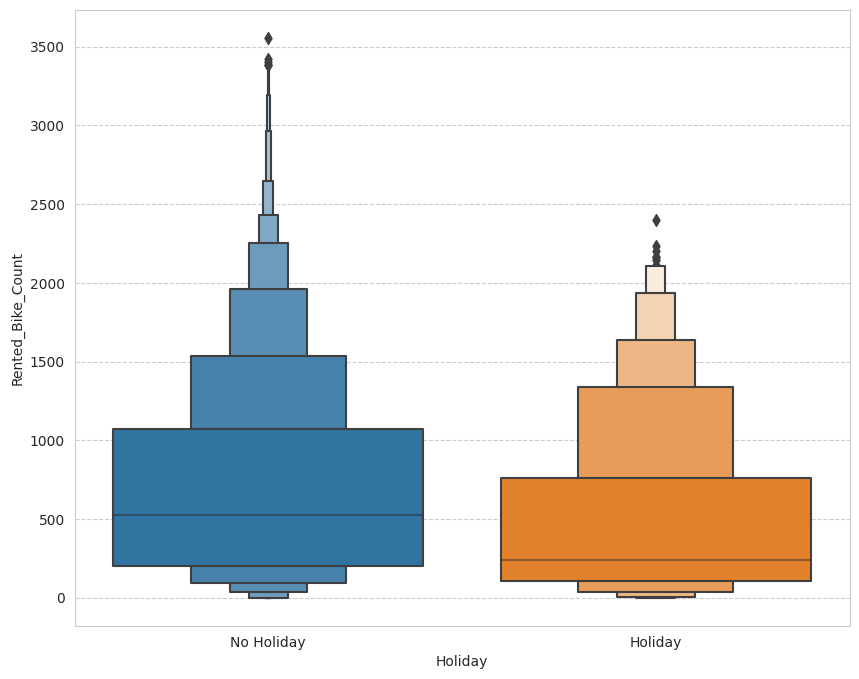

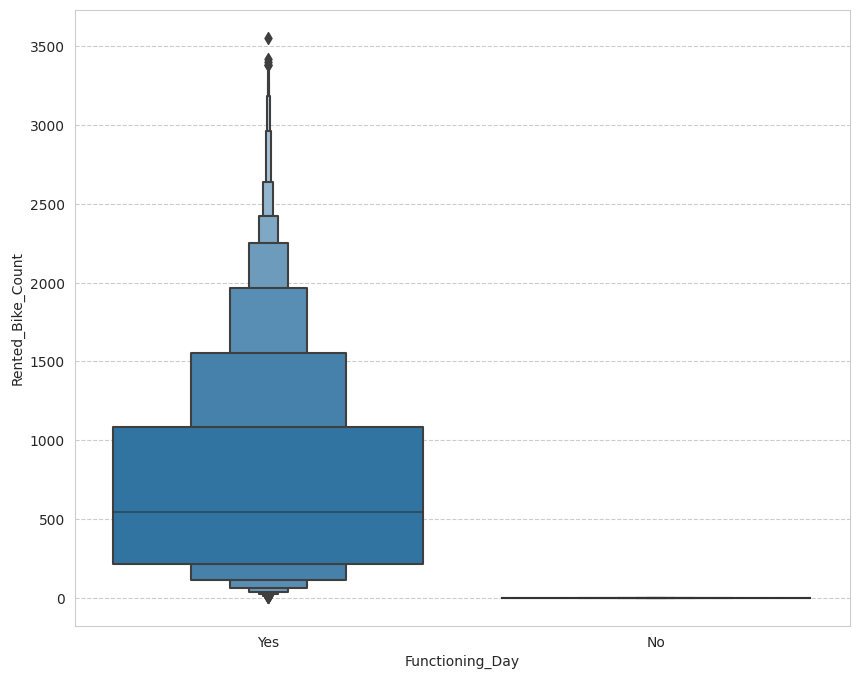

In [ ]:
#ploting Boxen plot to visualize and trying to get information from plot
for col in categorical_features:
    plt.figure(figsize=(10,8))
    sns.boxenplot(x=df[col], y=df["Rented_Bike_Count"])
    plt.show()

In [ ]:
#checking counts of functioning day
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

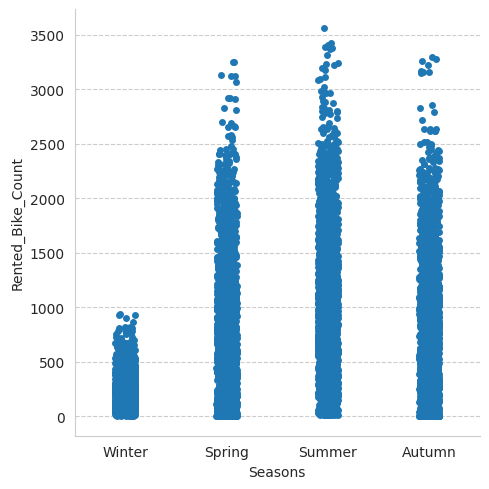

In [ ]:
#ploting cat plot for more info
sns.catplot(x='Seasons',y='Rented_Bike_Count',data=df)

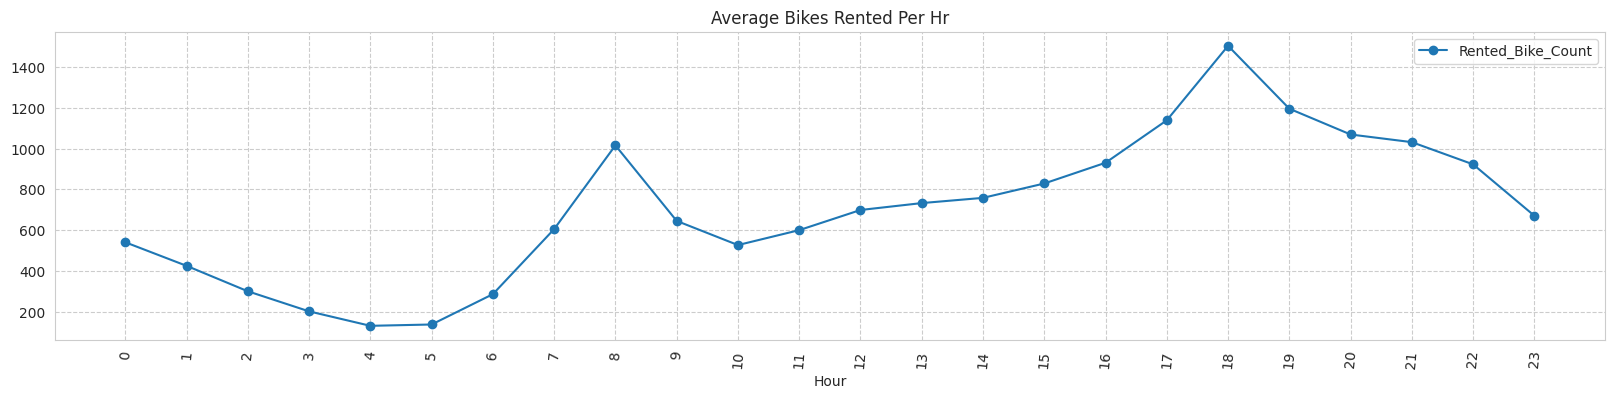

In [ ]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = df.groupby('Hour')['Rented_Bike_Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);

In [ ]:
df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  weekdays_weekend  
0  No Holiday             Yes      1                 0  
1  No Holiday             Yes      1                 0  
2  No Holiday             Yes      1                 0  
3  No Holiday             Yes      1                 0  
4  No Holiday             Yes      1                 0

In [ ]:
dff=df.copy()

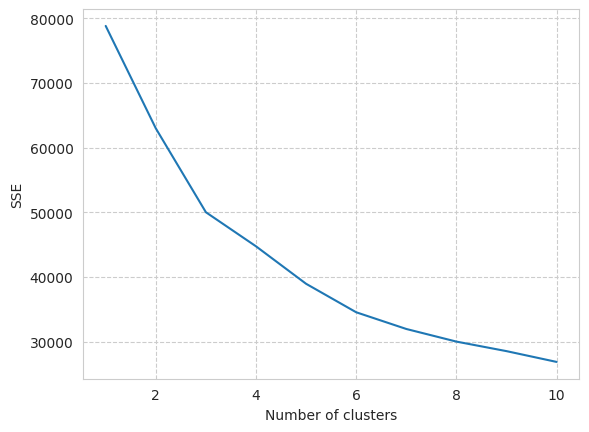

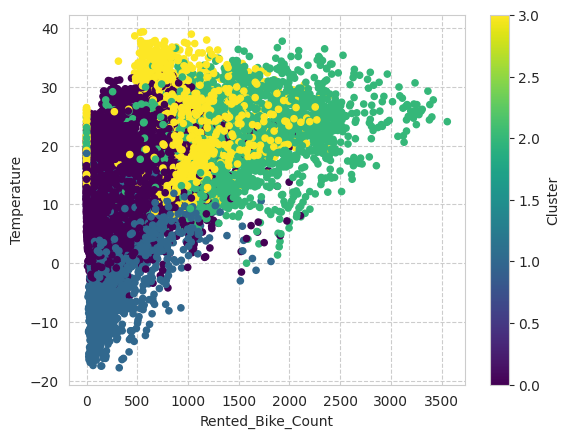

In [ ]:

# Import the necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Preprocess the data
df1 = dff.dropna() # Remove missing values
df1 = dff.drop(columns=['Holiday']) # Remove irrelevant columns
df1['Seasons'] = df1['Seasons'].map({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3}) # Convert categorical variable to numerical

# Select the features
X = dff[['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall']].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Perform clustering using the optimal number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Visualize the clusters
dff['Cluster'] = labels
dff.plot(kind='scatter', x='Rented_Bike_Count', y='Temperature', c='Cluster', cmap='viridis')
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Temperature')
plt.show()


In [ ]:
df.head()

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  weekdays_weekend  
0  No Holiday             Yes      1                 0  
1  No Holiday             Yes      1                 0  
2  No Holiday             Yes      1                 0  
3  No Holiday             Yes      1                 0  
4  No Holiday             Yes      1                 0

In [ ]:
# make copy of dataset

df2=df.copy()

In [ ]:
df2.head()


Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  weekdays_weekend  
0  No Holiday             Yes      1                 0  
1  No Holiday             Yes      1                 0  
2  No Holiday             Yes      1                 0  
3  No Holiday             Yes      1                 0  
4  No Holiday             Yes      1                 0

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def Calculate_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
Calculate_vif(df2[[i for i in df2.describe().columns if i not in ['Rented_Bike_Count']]])

variables        VIF
0                    Hour   4.424147
1             Temperature  34.331857
2                Humidity   6.973710
3              Wind_speed   4.835871
4              Visibility   9.309721
5   Dew_point_temperature  17.758961
6         Solar_Radiation   2.881777
7                Rainfall   1.082987
8                Snowfall   1.125842
9                   month   4.690212
10       weekdays_weekend   1.416551

In [ ]:
Calculate_vif(df2[[i for i in df2.describe().columns if i not in ['Rented_Bike_Count','Humidity']]])

variables        VIF
0                   Hour   4.261971
1            Temperature  32.943543
2             Wind_speed   4.359571
3             Visibility   8.411644
4  Dew_point_temperature  15.570048
5        Solar_Radiation   2.791031
6               Rainfall   1.056313
7               Snowfall   1.090246
8                  month   3.741733
9       weekdays_weekend   1.379568

In [ ]:
Calculate_vif(df2[[i for i in df2.describe().columns if i not in ['Rented_Bike_Count','Humidity','Visibility']]])


variables        VIF
0                   Hour   4.261758
1            Temperature  20.568971
2             Wind_speed   4.160796
3  Dew_point_temperature   9.867059
4        Solar_Radiation   2.485410
5               Rainfall   1.055283
6               Snowfall   1.090139
7                  month   3.294112
8       weekdays_weekend   1.372579

In [ ]:
# As per above vif calculation dropping humidity and visibility columns.
df2.drop(['Humidity','Visibility'],inplace=True,axis=1)

In [ ]:
# checking categoiries in season column.
df2['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
# Createing dummy variables
df2=pd.get_dummies(df2,columns=['Seasons'],prefix='Seasons',drop_first=True)

In [ ]:
# checking categoiries in holiday columns.
df2['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
# Labeling for holiday=1 and no holiday=0
df2['Holiday']=df2['Holiday'].map({'No Holiday':0, 'Holiday':1})

In [ ]:
# # Labeling for Yes=1 and no No=0
df2['Functioning_Day']=df2['Functioning_Day'].map({'Yes':1, 'No':0})

In [ ]:
# checking dummy and labled columns
df2.head(3)

Rented_Bike_Count  Hour  Temperature  Wind_speed  Dew_point_temperature  \
0                254     0         -5.2         2.2                  -17.6   
1                204     1         -5.5         0.8                  -17.6   
2                173     2         -6.0         1.0                  -17.7   

   Solar_Radiation  Rainfall  Snowfall  Holiday  Functioning_Day  month  \
0              0.0       0.0       0.0        0                1      1   
1              0.0       0.0       0.0        0                1      1   
2              0.0       0.0       0.0        0                1      1   

   weekdays_weekend  Seasons_Spring  Seasons_Summer  Seasons_Winter  
0                 0               0               0               1  
1                 0               0               0               1  
2                 0               0               0               1

In [ ]:
# final info before going for modeling
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Wind_speed             8760 non-null   float64
 4   Dew_point_temperature  8760 non-null   float64
 5   Solar_Radiation        8760 non-null   float64
 6   Rainfall               8760 non-null   float64
 7   Snowfall               8760 non-null   float64
 8   Holiday                8760 non-null   int64  
 9   Functioning_Day        8760 non-null   int64  
 10  month                  8760 non-null   int64  
 11  weekdays_weekend       8760 non-null   int64  
 12  Seasons_Spring         8760 non-null   uint8  
 13  Seasons_Summer         8760 non-null   uint8  
 14  Seasons_Winter         8760 non-null   uint8  
dtypes: f

In [ ]:
df2.head()

Rented_Bike_Count  Hour  Temperature  Wind_speed  Dew_point_temperature  \
0                254     0         -5.2         2.2                  -17.6   
1                204     1         -5.5         0.8                  -17.6   
2                173     2         -6.0         1.0                  -17.7   
3                107     3         -6.2         0.9                  -17.6   
4                 78     4         -6.0         2.3                  -18.6   

   Solar_Radiation  Rainfall  Snowfall  Holiday  Functioning_Day  month  \
0              0.0       0.0       0.0        0                1      1   
1              0.0       0.0       0.0        0                1      1   
2              0.0       0.0       0.0        0                1      1   
3              0.0       0.0       0.0        0                1      1   
4              0.0       0.0       0.0        0                1      1   

   weekdays_weekend  Seasons_Spring  Seasons_Summer  Seasons_Winter  
0                 0               0               0               1  
1                 0               0               0               1  
2                 0               0               0               1  
3                 0               0               0               1  
4                 0               0               0               1

In [ ]:
# Fuzzy C means

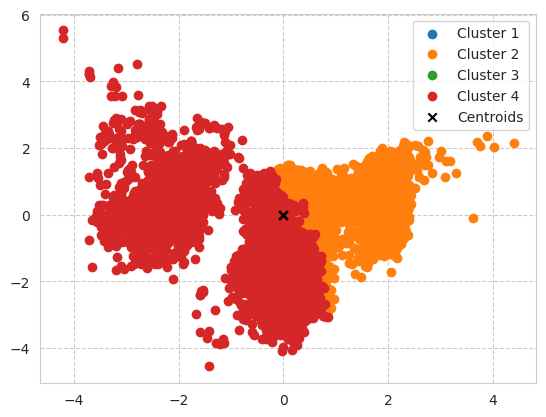

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances


# Preprocess the data
X = df2.iloc[:, 3:].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Determine the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Choose the number of clusters with the highest silhouette score
n_clusters = np.argmax(silhouette_scores) + 2
n_clusters_reduced = 4 # set the reduced number of clusters

# Perform Fuzzy C-Means clustering
def cmeans(X, n_clusters, m=2, max_iter=100, tol=1e-4):
    # Initialize the cluster centroids and membership matrix
    C = X[np.random.choice(len(X), n_clusters, replace=False)]
    U = np.random.dirichlet(np.ones(n_clusters), len(X))

    # Iterate until convergence or max_iter is reached
    for i in range(max_iter):
        # Update the cluster centroids
        C_old = C.copy()
        for j in range(n_clusters):
            C[j] = np.sum(U[:, j].reshape(-1, 1) ** m * X, axis=0) / np.sum(U[:, j] ** m)

        # Update the membership matrix
        dist = euclidean_distances(X, C)
        U = 1 / np.power(dist, 2 / (m - 1))
        U /= np.sum(U, axis=1).reshape(-1, 1)

        # Check for convergence
        if np.linalg.norm(C - C_old) < tol:
            break

    return C, U

C, U = cmeans(X, n_clusters_reduced, m=2, max_iter=100, tol=1e-4)

# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for i in range(n_clusters_reduced):
    ax.scatter(X_pca[U[:, i] == np.max(U, axis=1), 0], X_pca[U[:, i] == np.max(U, axis=1), 1], label=f"Cluster {i + 1}")
ax.scatter(C[:, 0], C[:, 1], marker="x", color="black", label="Centroids")
ax.legend()
plt.show()


In [ ]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.5/202.5 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 42.6 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42034 sha256=66d9ea23e0f1d3a9d515c30fb34b7cd02a6129430e80312c5d51e96e1d20bdeb
  Stored in directory: /root/.cache/pip/wheels/c5/94/da/41abe415f64706710726291086a814dd8b9e0dab1c491ef6ed
Successfully built factor_analyzer


In [ ]:
# FACTOR ANALYSIS
import numpy as np
from factor_analyzer import FactorAnalyzer

# initialize factor analyzer object
fa = FactorAnalyzer()

# specify number of factors to extract
num_factors = 3

# fit factor analyzer to data and extract factors
fa.fit(df2)
loadings = fa.loadings_

# print factor loadings
print("Factor loadings:\n", loadings)

Factor loadings:
 [[ 4.79375576e-01  8.81828560e-02  4.62245925e-01]
 [ 5.57754992e-02  1.59709290e-02  5.22357534e-01]
 [ 9.43733969e-01  2.12086675e-01  5.44288695e-02]
 [-8.43681076e-02 -1.04116114e-01  5.26634364e-01]
 [ 8.99110987e-01  2.20849470e-01 -2.55159144e-01]
 [ 2.31901372e-01 -3.90093989e-02  3.93868358e-01]
 [ 6.65212954e-02  8.11463963e-05 -1.33770210e-01]
 [-2.37442074e-01  7.00862928e-02 -1.05868017e-02]
 [-9.63328888e-02  1.57476765e-02  1.96246601e-02]
 [-2.38683118e-02  1.99177702e-02  1.18474947e-01]
 [ 1.79635791e-02  2.17098876e-01 -2.62300421e-02]
 [-1.90797176e-02  2.45023719e-03 -1.25789454e-02]
 [ 3.59561049e-01 -9.90931037e-01 -1.28188241e-01]
 [ 4.97358572e-01  4.76529827e-01 -8.31071661e-03]
 [-8.50110194e-01  1.57483502e-01  1.72065805e-01]]


In [ ]:
ev, v = fa.get_eigenvalues()
ev

array([3.52693437, 1.74085752, 1.4415795 , 1.13234251, 1.05769033,
       1.02096331, 0.99790337, 0.95519985, 0.88412224, 0.82750147,
       0.57553934, 0.39000094, 0.24093575, 0.17204929, 0.03638021])

In [ ]:
sorted(ev)

[0.03638021011887888,
 0.17204928821536944,
 0.2409357546017857,
 0.3900009367621154,
 0.5755393422591972,
 0.8275014740066442,
 0.8841222410148962,
 0.9551998473516831,
 0.9979033689630333,
 1.0209633083506582,
 1.0576903263597195,
 1.1323425105047848,
 1.441579502244821,
 1.7408575194601552,
 3.526934369786267]

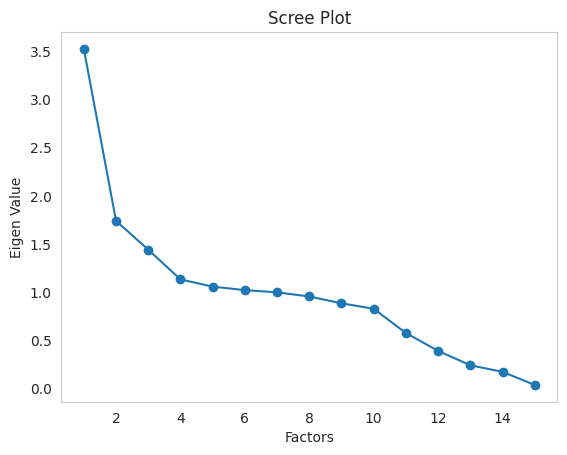

In [ ]:
plt.scatter(range(1,df2.shape[1]+1),ev)
plt.plot(range(1,df2.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
plt.show()

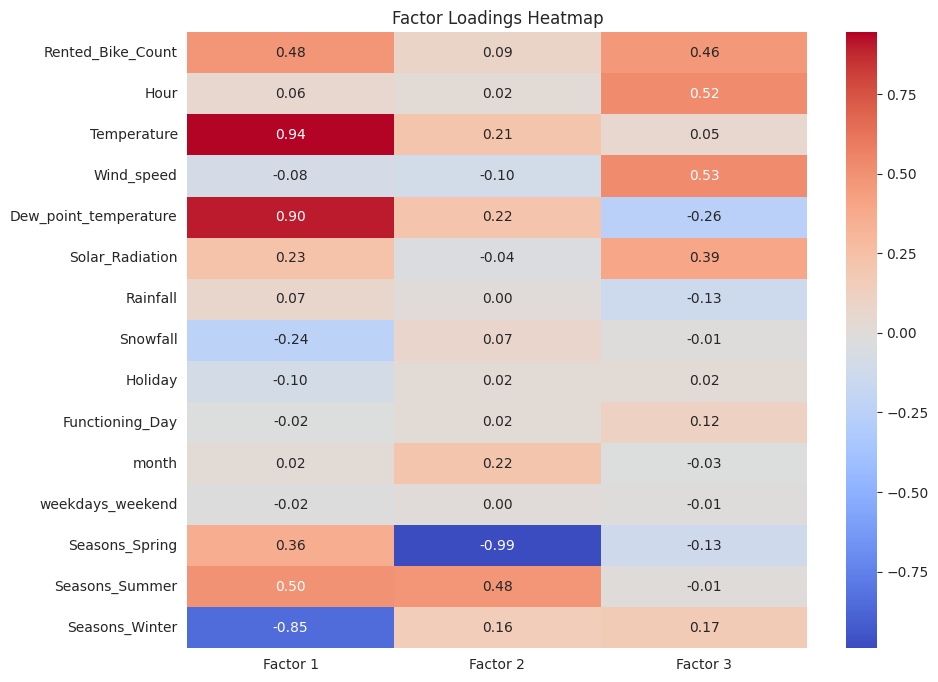

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap of the factor loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt='.2f', 
            xticklabels=['Factor 1', 'Factor 2', 'Factor 3'], 
            yticklabels=df2.columns[:])
plt.title('Factor Loadings Heatmap')
plt.show()


In [ ]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)

In [ ]:
dummy_categorical_feature


Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0                  0               0               1                   1   
1                  0               0               1                   1   
2                  0               0               1                   1   
3                  0               0               1                   1   
4                  0               0               1                   1   
...              ...             ...             ...                 ...   
8755               0               0               0                   1   
8756               0               0               0                   1   
8757               0               0               0                   1   
8758               0               0               0                   1   
8759               0               0               0                   1   

      Functioning_Day_Yes  
0                       1  
1                       1  
2                       1  
3                       1  
4                       1  
...                   ...  
8755                    1  
8756                    1  
8757                    1  
8758                    1  
8759                    1  

[8760 rows x 5 columns]

In [ ]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)

In [ ]:
#showing head of final df
final_df.head()

Seasons_Spring  Seasons_Summer  Seasons_Winter  Holiday_No Holiday  \
0               0               0               1                   1   
1               0               0               1                   1   
2               0               0               1                   1   
3               0               0               1                   1   
4               0               0               1                   1   

   Functioning_Day_Yes  Rented_Bike_Count  Hour  Temperature  Humidity  \
0                    1                254     0         -5.2        37   
1                    1                204     1         -5.5        38   
2                    1                173     2         -6.0        39   
3                    1                107     3         -6.2        40   
4                    1                 78     4         -6.0        36   

   Wind_speed  Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  \
0         2.2        2000                  -17.6              0.0       0.0   
1         0.8        2000                  -17.6              0.0       0.0   
2         1.0        2000                  -17.7              0.0       0.0   
3         0.9        2000                  -17.6              0.0       0.0   
4         2.3        2000                  -18.6              0.0       0.0   

   Snowfall  month  weekdays_weekend  
0       0.0      1                 0  
1       0.0      1                 0  
2       0.0      1                 0  
3       0.0      1                 0  
4       0.0      1                 0

In [ ]:
#describing final DF
final_df.describe().transpose()


count         mean         std   min     25%      50%  \
Seasons_Spring         8760.0     0.252055    0.434217   0.0    0.00     0.00   
Seasons_Summer         8760.0     0.252055    0.434217   0.0    0.00     0.00   
Seasons_Winter         8760.0     0.246575    0.431042   0.0    0.00     0.00   
Holiday_No Holiday     8760.0     0.950685    0.216537   0.0    1.00     1.00   
Functioning_Day_Yes    8760.0     0.966324    0.180404   0.0    1.00     1.00   
Rented_Bike_Count      8760.0   704.602055  644.997468   0.0  191.00   504.50   
Hour                   8760.0    11.500000    6.922582   0.0    5.75    11.50   
Temperature            8760.0    12.882922   11.944825 -17.8    3.50    13.70   
Humidity               8760.0    58.226256   20.362413   0.0   42.00    57.00   
Wind_speed             8760.0     1.724909    1.036300   0.0    0.90     1.50   
Visibility             8760.0  1436.825799  608.298712  27.0  940.00  1698.00   
Dew_point_temperature  8760.0     4.073813   13.060369 -30.6   -4.70     5.10   
Solar_Radiation        8760.0     0.569111    0.868746   0.0    0.00     0.01   
Rainfall               8760.0     0.148687    1.128193   0.0    0.00     0.00   
Snowfall               8760.0     0.075068    0.436746   0.0    0.00     0.00   
month                  8760.0     6.526027    3.448048   1.0    4.00     7.00   
weekdays_weekend       8760.0     0.290411    0.453978   0.0    0.00     0.00   

                           75%      max  
Seasons_Spring            1.00     1.00  
Seasons_Summer            1.00     1.00  
Seasons_Winter            0.00     1.00  
Holiday_No Holiday        1.00     1.00  
Functioning_Day_Yes       1.00     1.00  
Rented_Bike_Count      1065.25  3556.00  
Hour                     17.25    23.00  
Temperature              22.50    39.40  
Humidity                 74.00    98.00  
Wind_speed                2.30     7.40  
Visibility             2000.00  2000.00  
Dew_point_temperature    14.80    27.20  
Solar_Radiation           0.93     3.52  
Rainfall                  0.00    35.00  
Snowfall                  0.00     8.80  
month                    10.00    12.00  
weekdays_weekend          1.00     1.00

<Figure size 2000x1600 with 0 Axes>

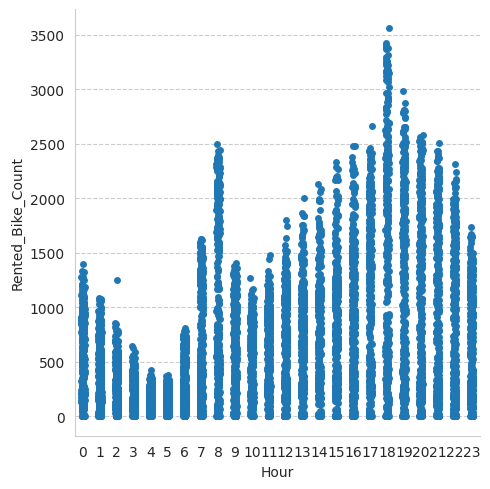

<Figure size 2000x1600 with 0 Axes>

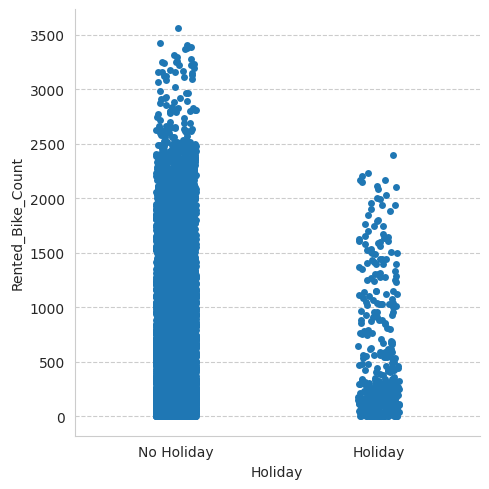

<Figure size 2000x1600 with 0 Axes>

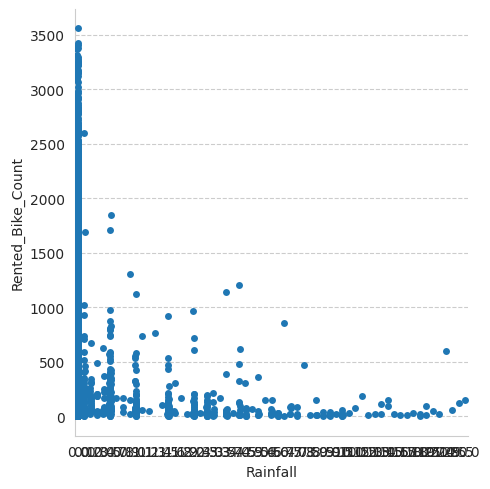

<Figure size 2000x1600 with 0 Axes>

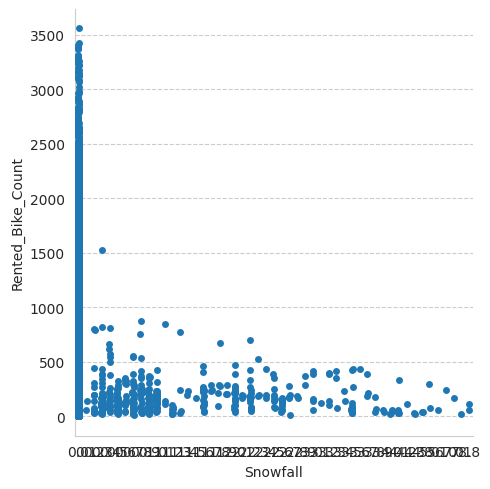

<Figure size 2000x1600 with 0 Axes>

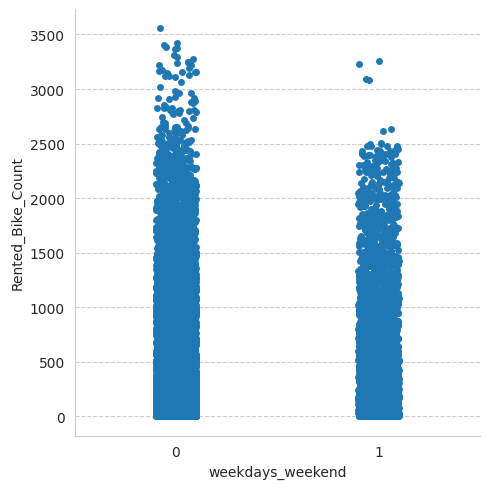

In [ ]:
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall','Snowfall','weekdays_weekend']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='Rented_Bike_Count',data=df)
  plt.show()

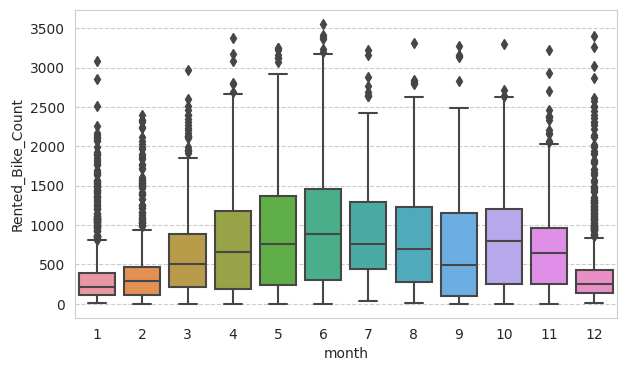

In [ ]:
plt.figure(figsize=(7,4),dpi=100)
sns.boxplot(x='month',y='Rented_Bike_Count',data=df)
plt.show()

In [ ]:
#Functions
#Creating Function to train linear models and calculate scores

In [ ]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [ ]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [ ]:
#creating function to run diffirent models

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

In [ ]:
#creating function to get feature importance

In [ ]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

In [ ]:
#lime tablular


In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=28f8fef957efc3213254fab7d89272d45a0dd5cc0164de236e400791fefc85de
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):
  
  # vaariable to store feature names
  # X=df.drop(dependent_var,axis=1)
  # feature_names =list(X.columns)
  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)

In [ ]:
#Train | Test Split for LR

In [ ]:
# Train - Spliting  data
X=final_df.drop(['Rented_Bike_Count'],axis=1)

In [ ]:
X.shape

(8760, 16)

In [ ]:
y=np.sqrt(final_df['Rented_Bike_Count'])

In [ ]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
#Linear Regresseion

from sklearn.linear_model import LinearRegression

#linear regression model

linear_model= LinearRegression()


================Evalution Matrix=========================

MSE : 175590.55287332056
RMSE : 419.03526447462696
R2 : 0.5729108337712394
Adjusted R2 :  0.5697661367350406

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



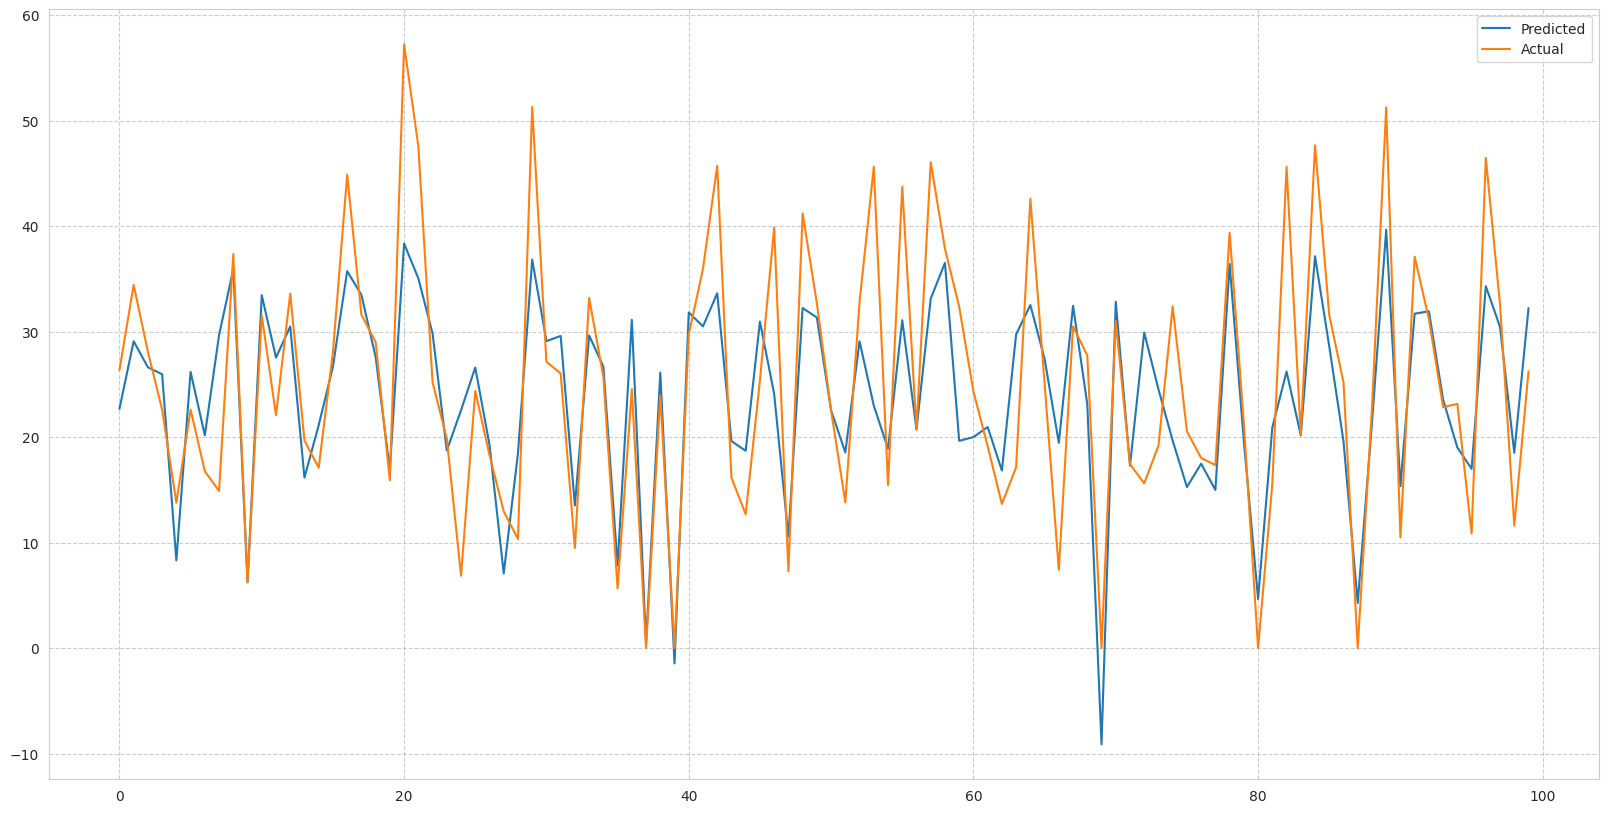

In [ ]:
train_linear_model(linear_model, X_train, y_train, X_test, y_test)


In [ ]:
#Regularisation


In [ ]:
#Lasso Regression
from sklearn.linear_model import Lasso

In [ ]:
# finding the best parameters for lasso by gridsearchcv
from sklearn.model_selection import GridSearchCV
lasso_model = Lasso()
#setting the parameters of the lasso model
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_grid = GridSearchCV(lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)


================Evalution Matrix=========================

MSE : 175560.90711843758
RMSE : 418.9998891627987
R2 : 0.5729829411854939
Adjusted R2 :  0.569838775082856

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



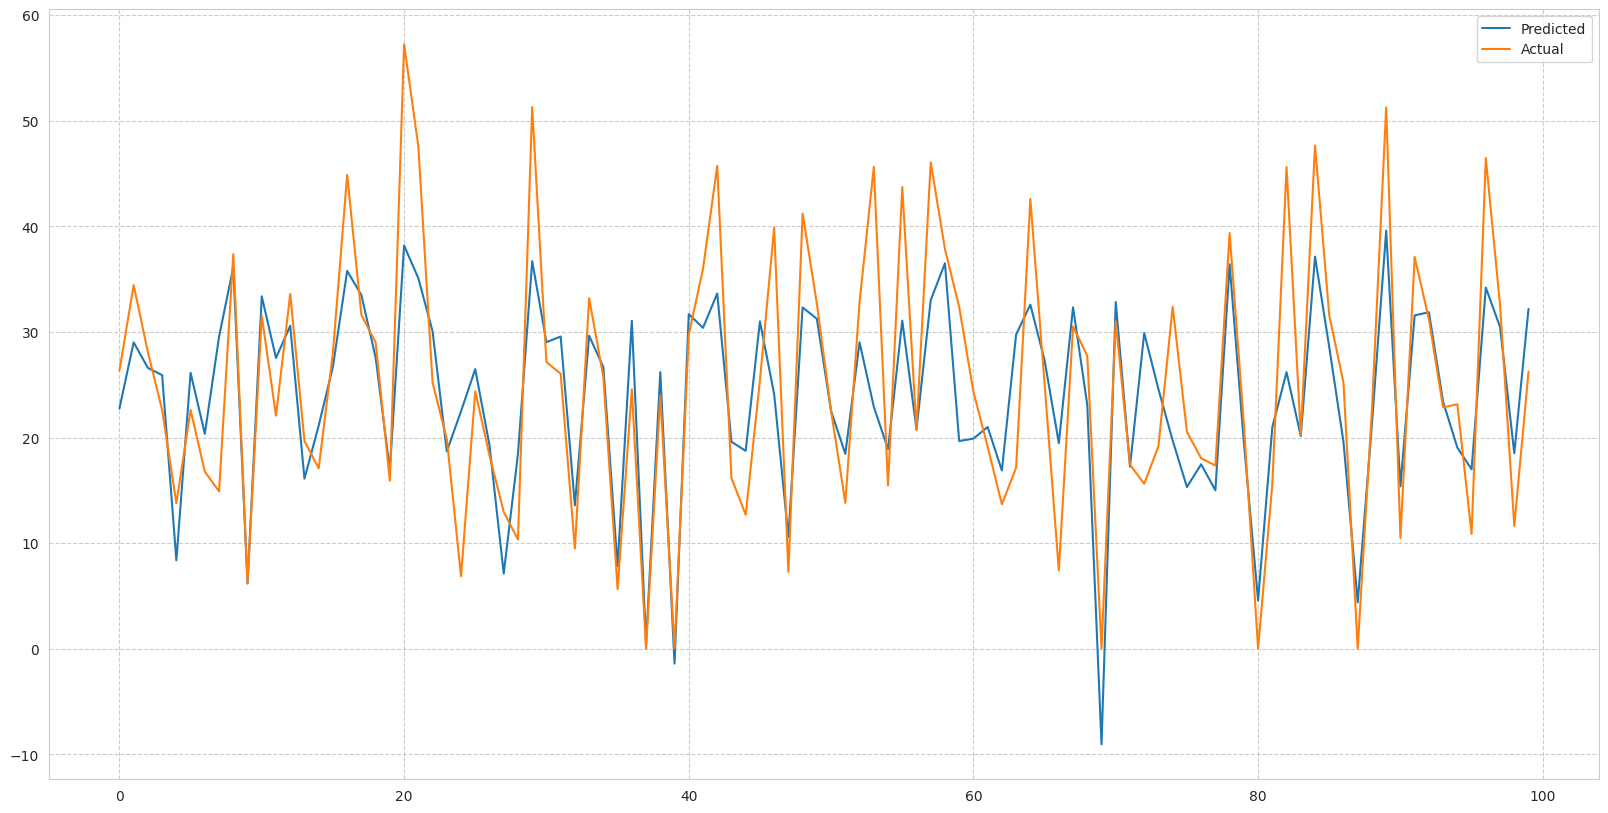

In [ ]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso_grid,X_train,y_train,X_test,y_test)

In [ ]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}
ridge_grid = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


================Evalution Matrix=========================

MSE : 175248.93506569506
RMSE : 418.6274418450074
R2 : 0.5737417512792726
Adjusted R2 :  0.5706031723655443

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



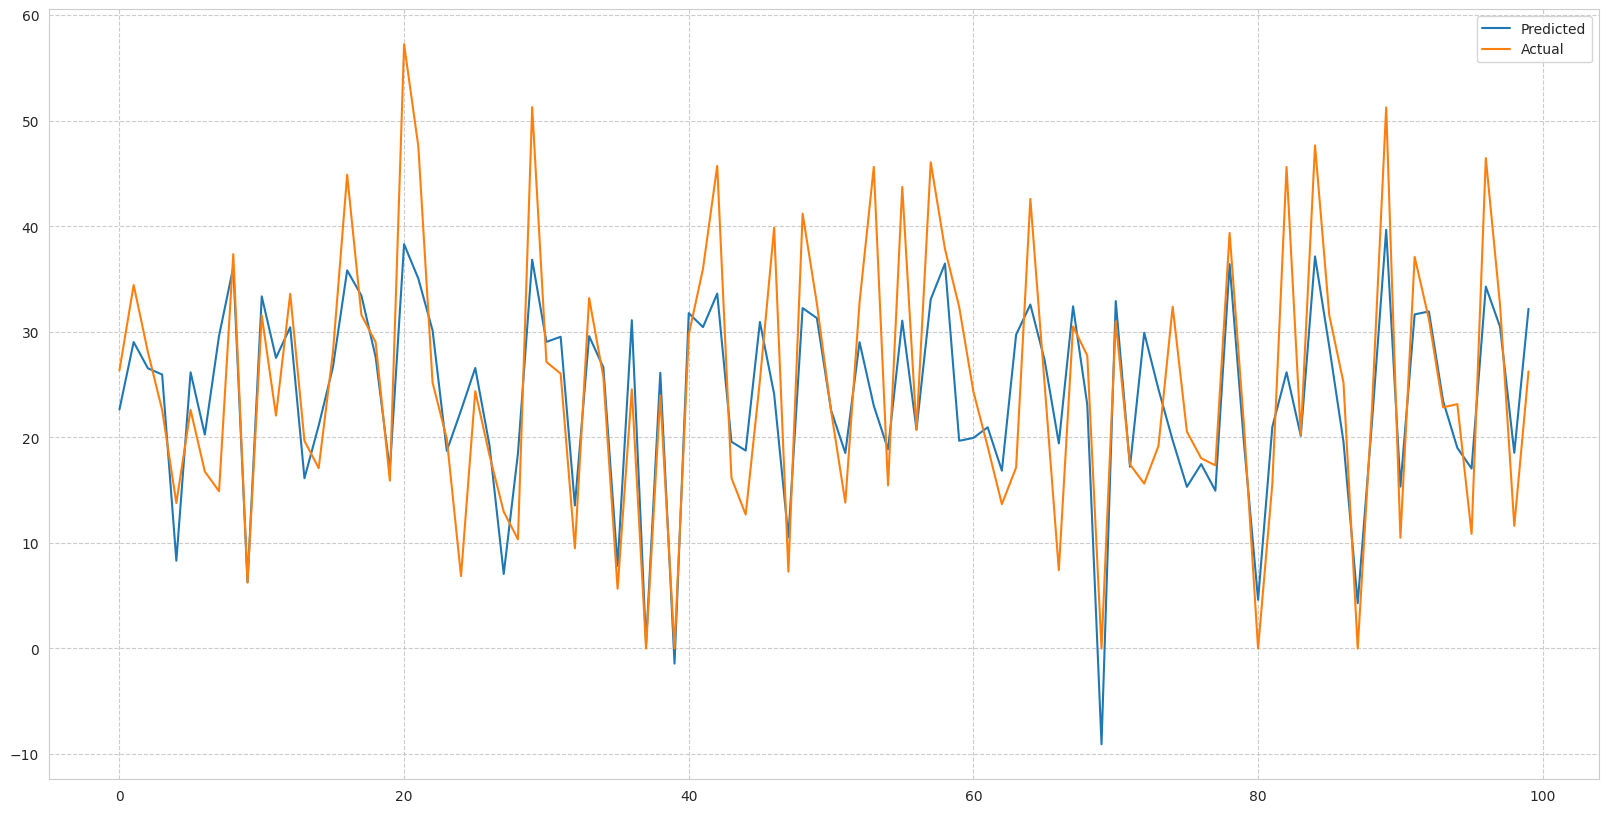

In [ ]:
# calling train_linear_model to train,fit and evalution of ridge model

train_linear_model(ridge_grid,X_train,y_train,X_test,y_test)

In [ ]:
#ElasticNet Regression

from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

# finding the best parameters for ridge model by gridsearchcv

parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_grid = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)


================Evalution Matrix=========================

MSE : 175346.86749857932
RMSE : 418.74439399062925
R2 : 0.5735035500752621
Adjusted R2 :  0.5703632172640354

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



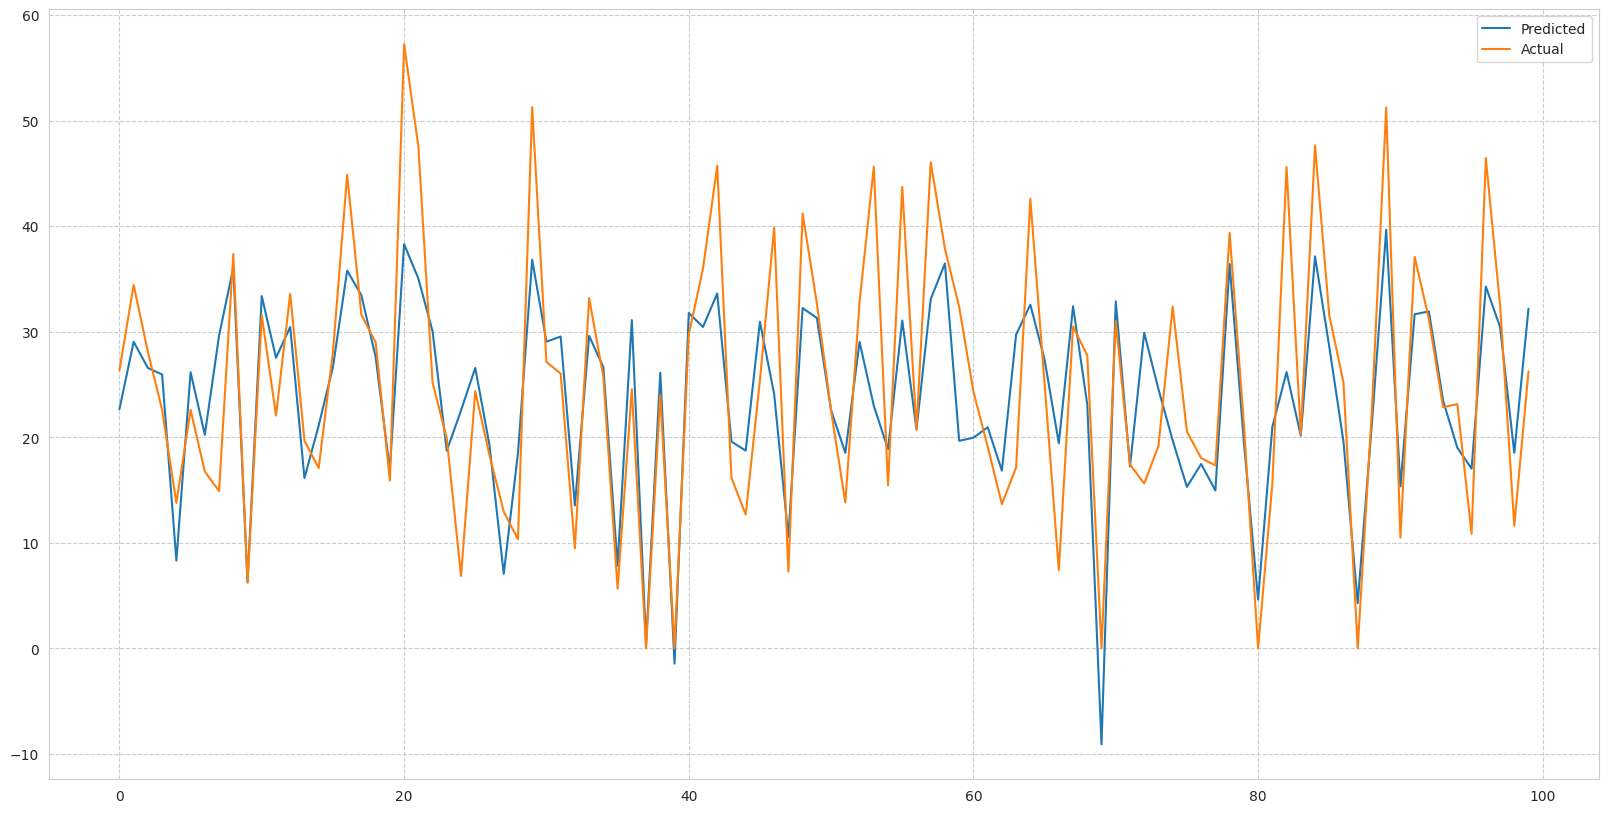

In [ ]:
# calling train_linear_model to train,fit and evalution of elasticnet model
train_linear_model(elastic_grid,X_train,y_train,X_test,y_test)

In [ ]:
#Polynomial Regression
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 118205.13966619587
RMSE : 343.8097434137024
R2 : 0.7124894607489991
Adjusted R2 :  0.7103724940540999

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



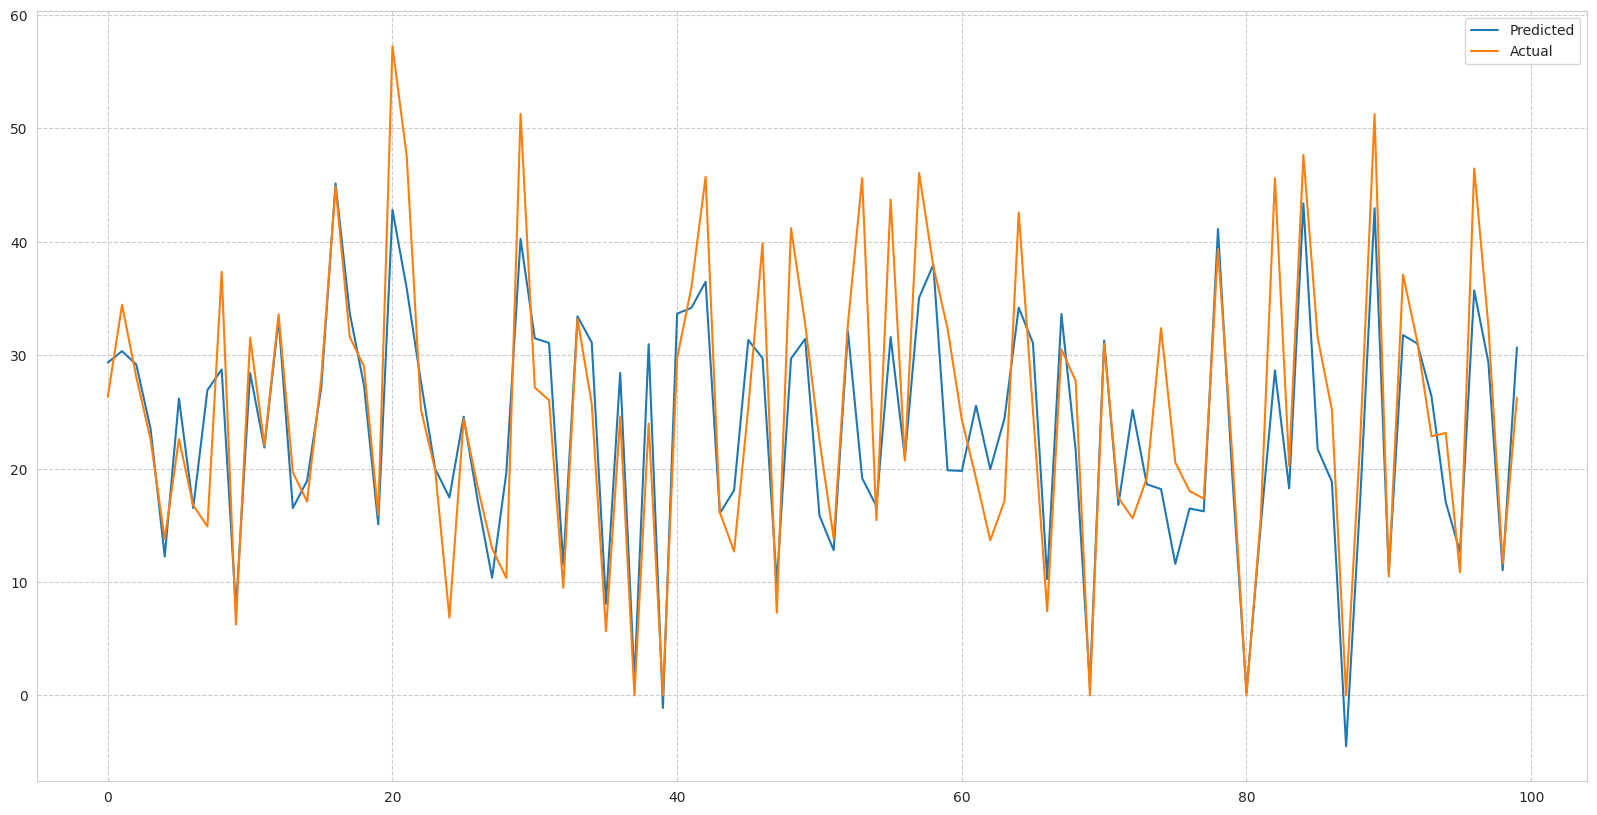

In [ ]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

In [ ]:
#KNN and Tree Based Method
#Train | Test split Data For Tree based methods

In [ ]:
#creatin X for independent variable
X=final_df.drop(['Rented_Bike_Count'],axis=1)

In [ ]:
#creating y for dependent variable
y=final_df['Rented_Bike_Count']

In [ ]:
#spliting X and y to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#creating model
scaler = MinMaxScaler()

In [ ]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


================Evalution Matrix=========================

MSE : 83411.75920852358
RMSE : 288.81094025075225
R2 : 0.7961594359879383
Adjusted R2 :  0.7946585390600998

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



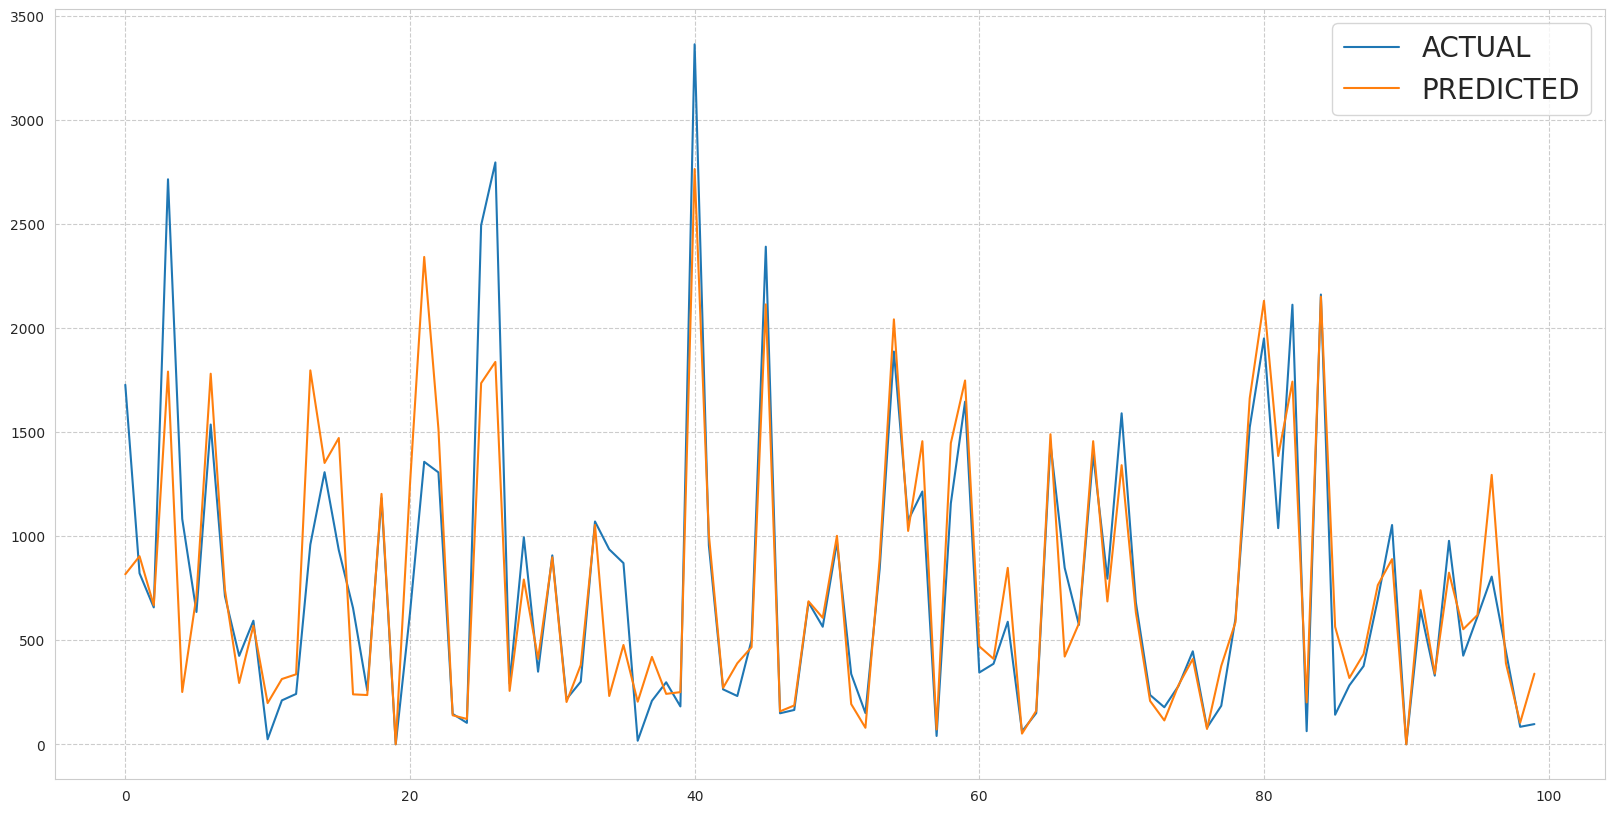

In [ ]:
# creating KNN model
knn_model = KNeighborsRegressor(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
run_model(knn_grid,X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor



================Evalution Matrix=========================

MSE : 90646.61369863014
RMSE : 301.07576072913963
R2 : 0.7784789934004401
Adjusted R2 :  0.7768479137384093

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



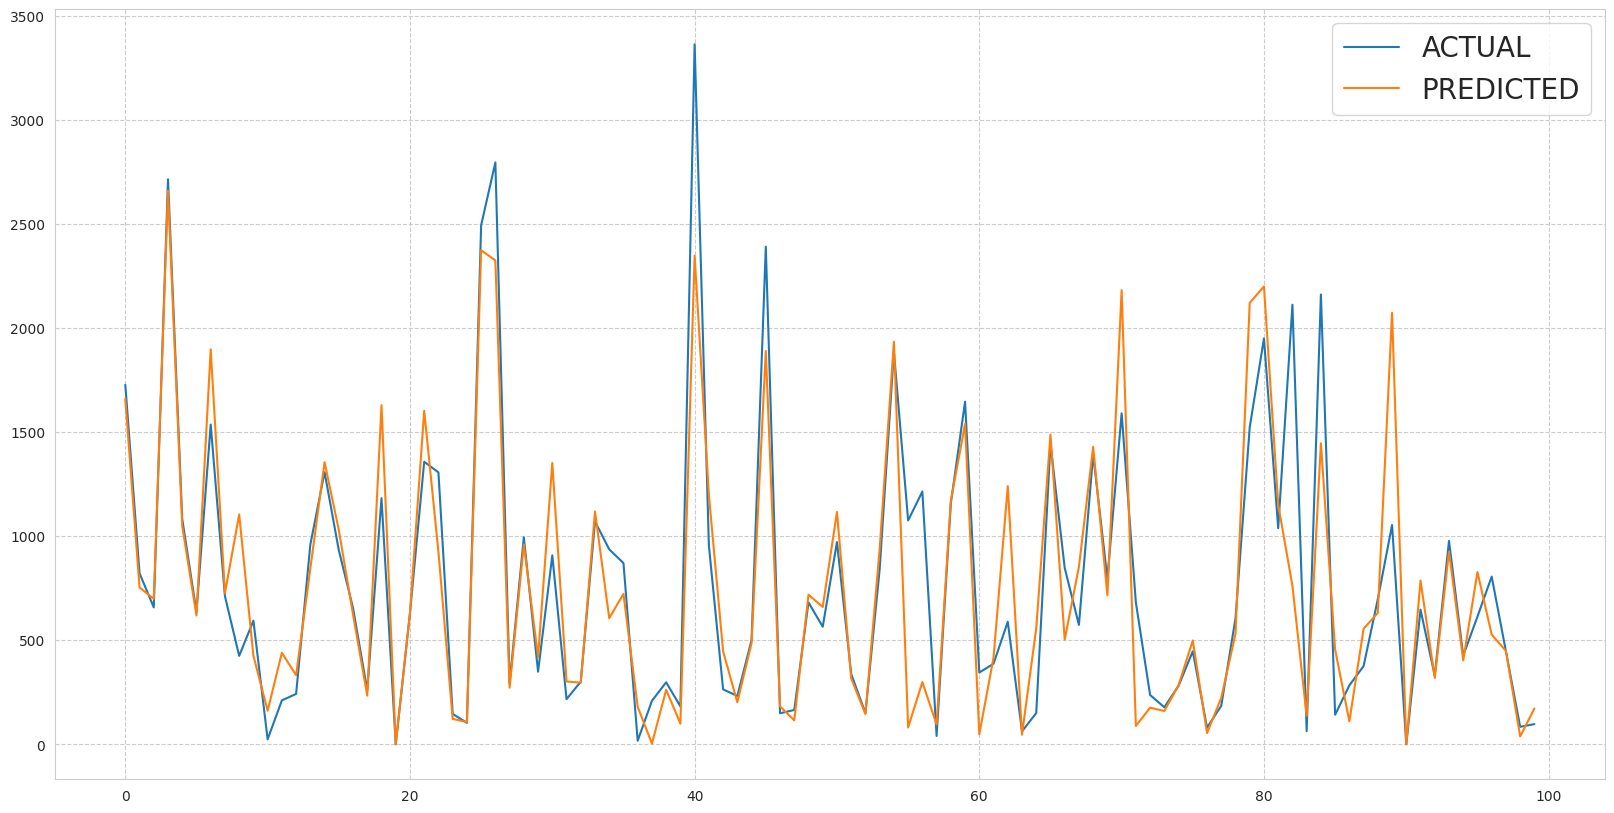

In [ ]:
#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model
run_model(dt_model,X_train,y_train,X_test,y_test)

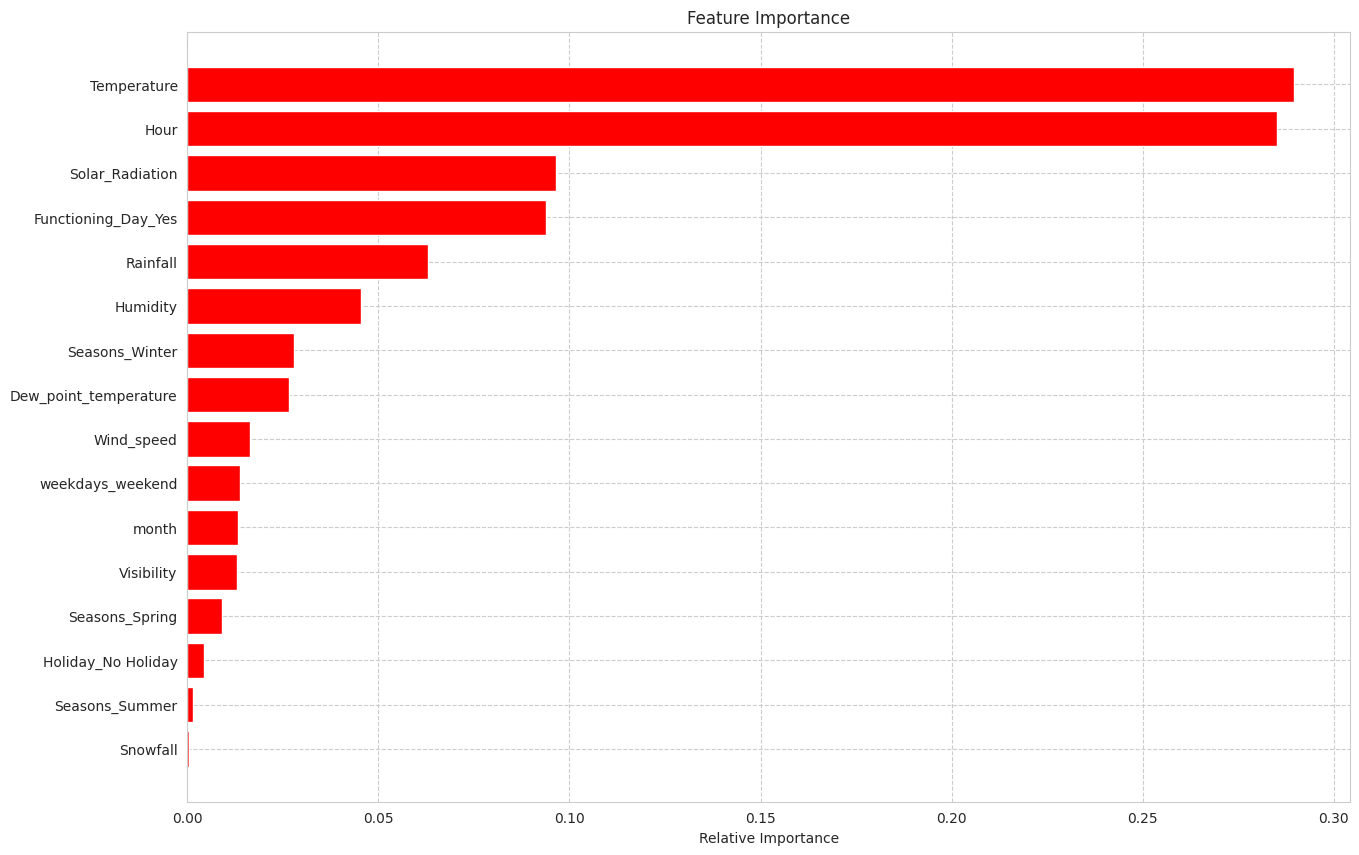

In [ ]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

In [ ]:
#Random Forest
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [ ]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [ ]:
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 62691.750320122395
RMSE : 250.3832069451192
R2 : 0.8467947221660894
Adjusted R2 :  0.8456666575340864

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



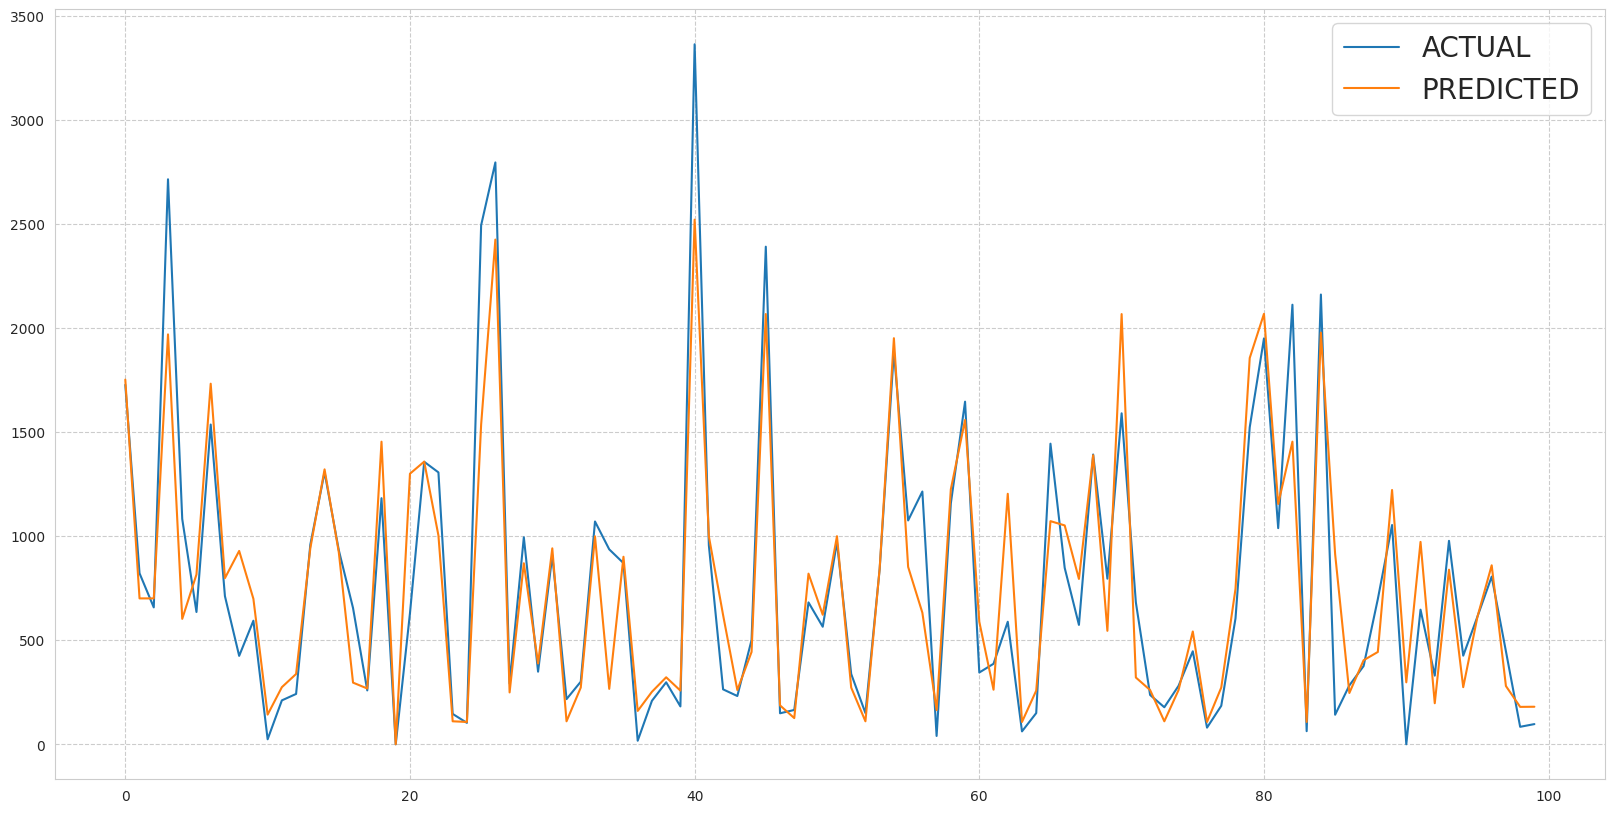

In [ ]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [ ]:
#optimal rf model
optimal_rf_model=rf_grid.best_estimator_

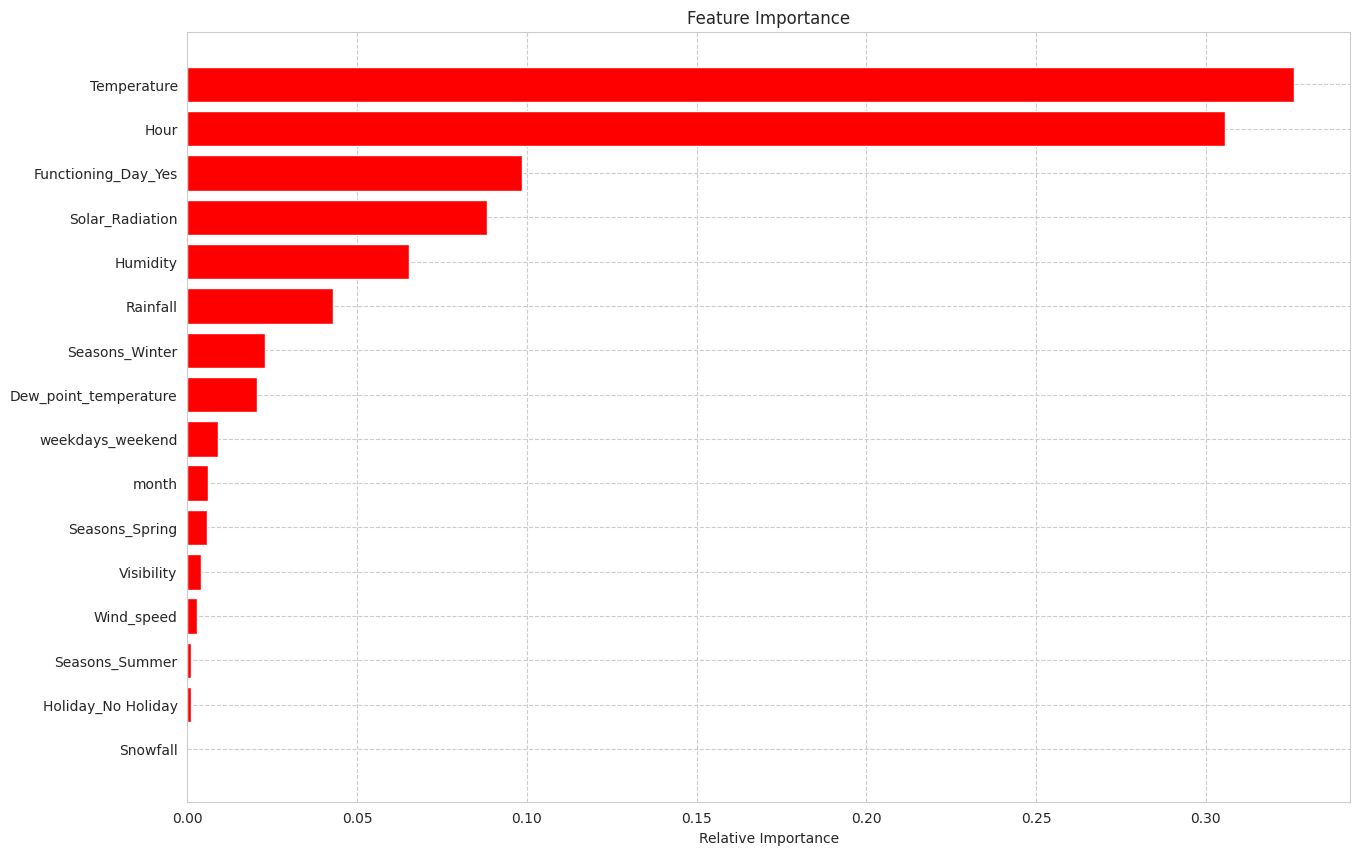

In [ ]:
#getting and visualizing features importance  of rf model
get_features_importance(optimal_rf_model,X_train)

In [ ]:
#Gradient Boosting
#importing Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
#creating model of Gradient Boosting
gb_model=GradientBoostingRegressor()

In [ ]:
# creating param dict to check diffirent value of parameter
n_estimators=[80,100,150]
max_depth=[15,20,30]

params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#grid search for gradient bossting
gb_grid= GridSearchCV(gb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 54614.730268819076
RMSE : 233.69794665084046
R2 : 0.8665332379151514
Adjusted R2 :  0.8655505098003987

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



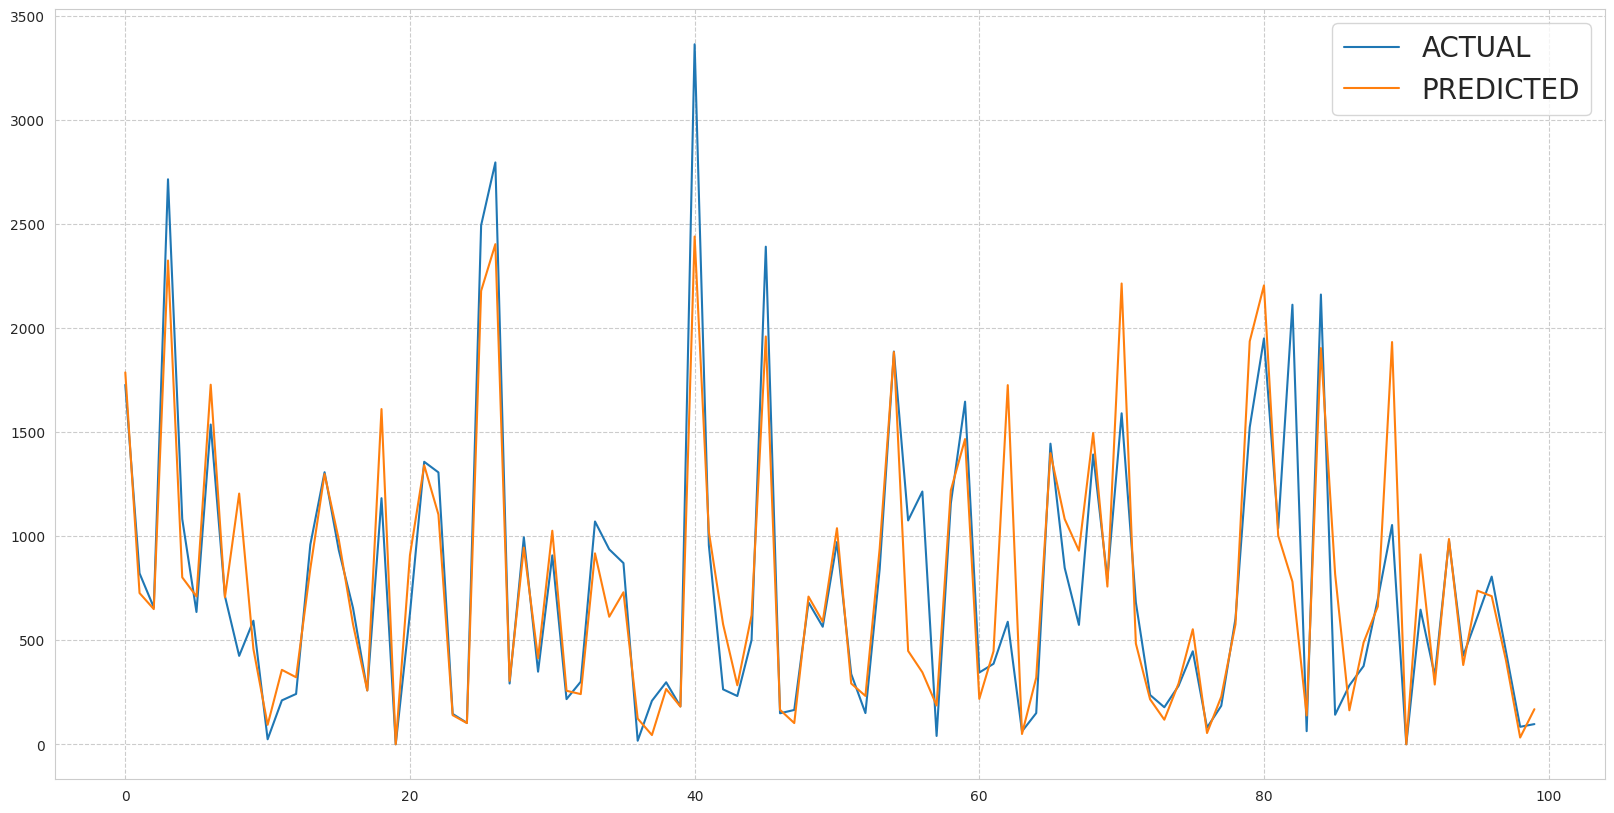

In [ ]:
#calling run_model to train,fit and evalution of gradient boosting model
run_model(gb_grid,X_train,y_train,X_test,y_test)

In [ ]:
#getting best estimator of GB model given by gb_grid model
optimal_gb_model=gb_grid.best_estimator_

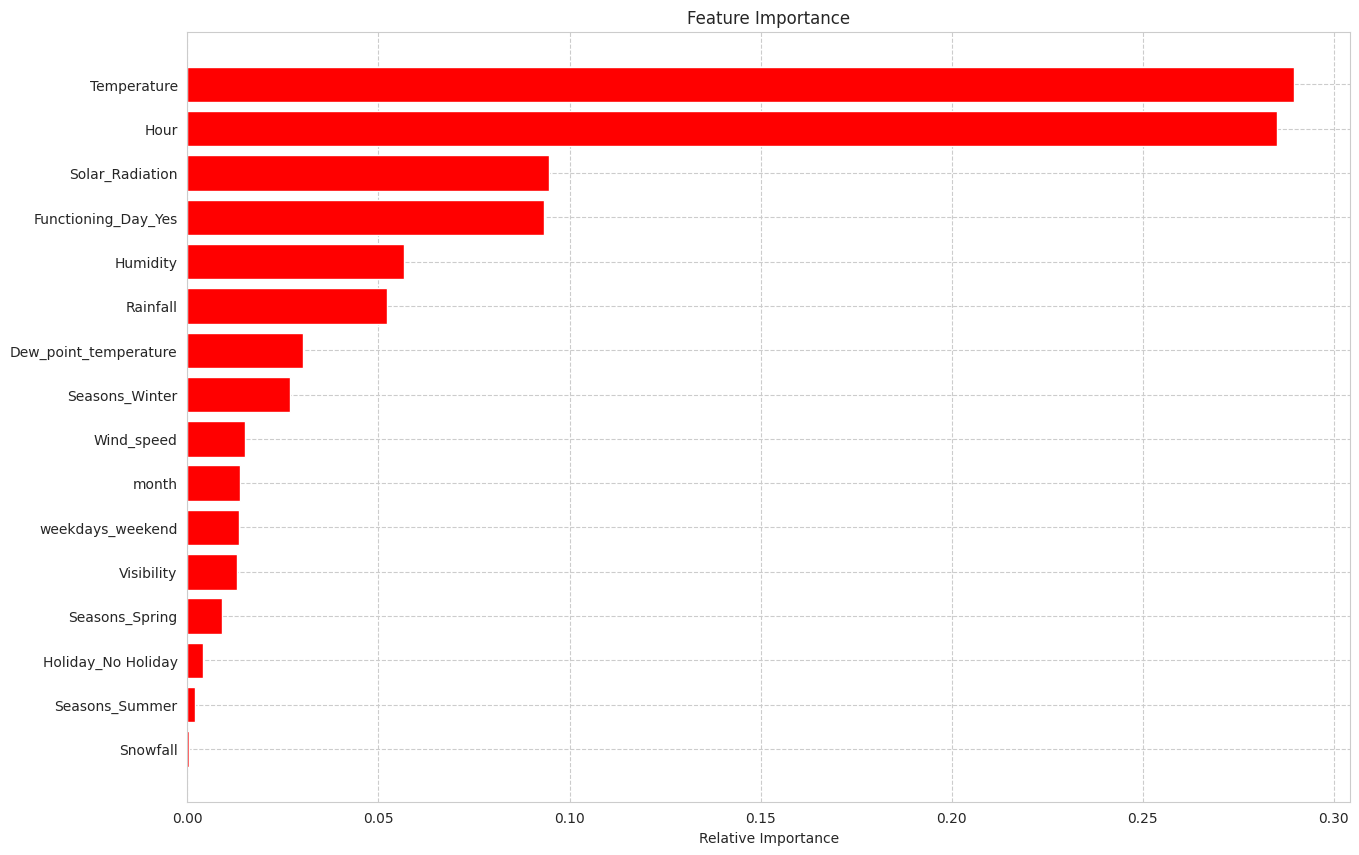

In [ ]:
#getting and visualizing features_importance of gradient boosting
get_features_importance(optimal_gb_model,X_train)

In [ ]:
#eXtreme Gradient Boosting
#importing XGBoost Regressor
from xgboost import XGBRegressor


In [ ]:
#creating Xgboost model
xgb_model=XGBRegressor()

In [ ]:
#creating param dict for gridsearch
n_estimators=[80,100,150]
max_depth=[15,20,30]


params = {'n_estimators':n_estimators,'max_depth':max_depth }

In [ ]:
#creating xgb grid model
xgb_grid= GridSearchCV(xgb_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 42764.78041172761
RMSE : 206.7964709847042
R2 : 0.895491990077968
Adjusted R2 :  0.8947224879340414

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



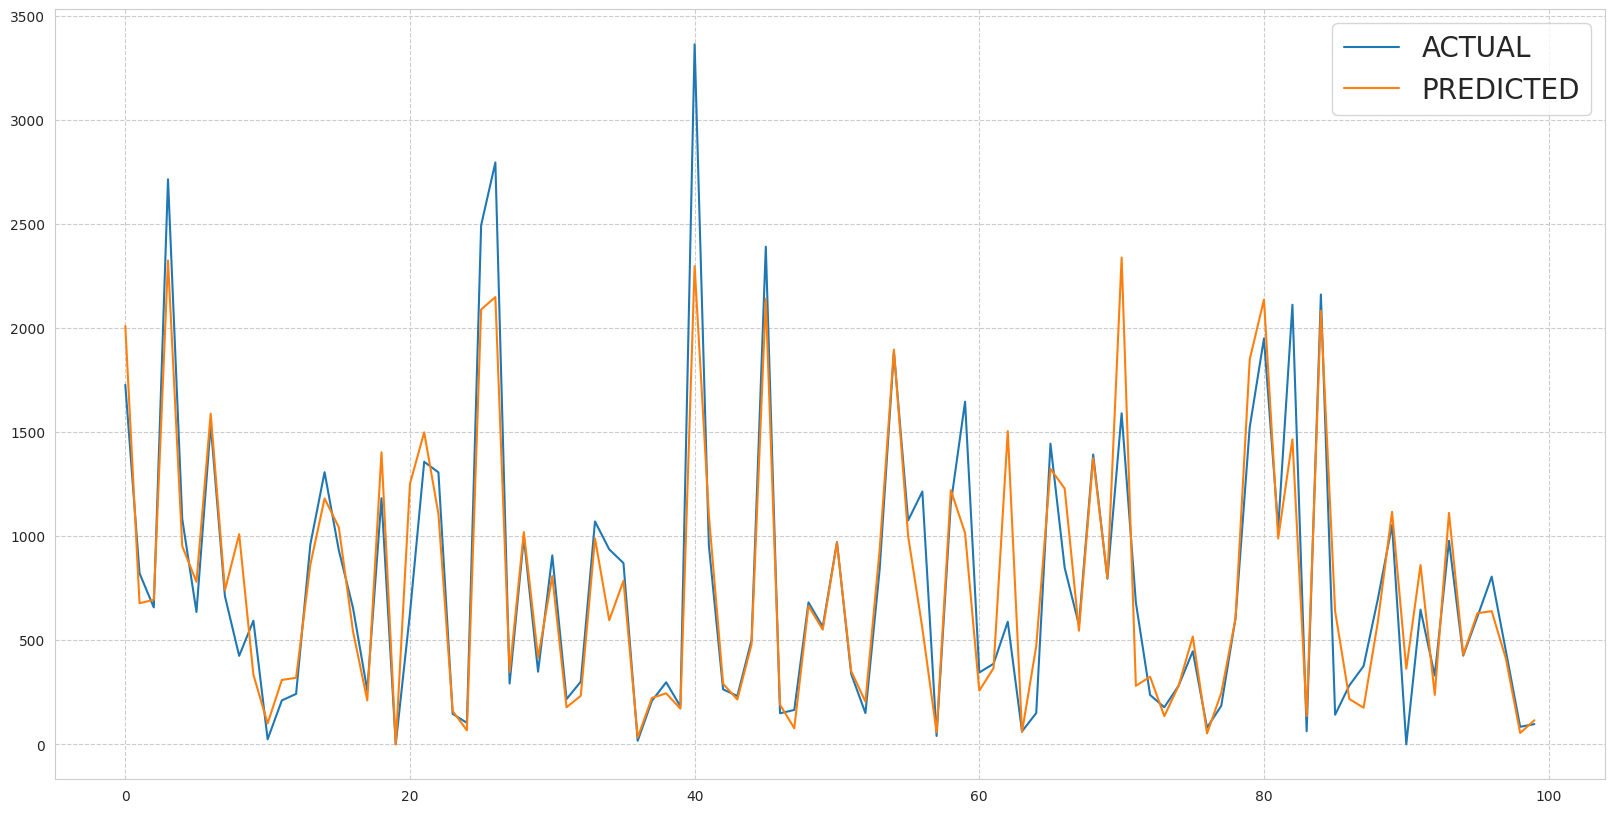

In [ ]:
#calling run_model to train,fit and evalution of xgb_grid model
run_model(xgb_grid,X_train,y_train,X_test,y_test);

In [ ]:
#getting best estimator of xgb model given by xgb grid model
optimal_xgb_model=xgb_grid.best_estimator_

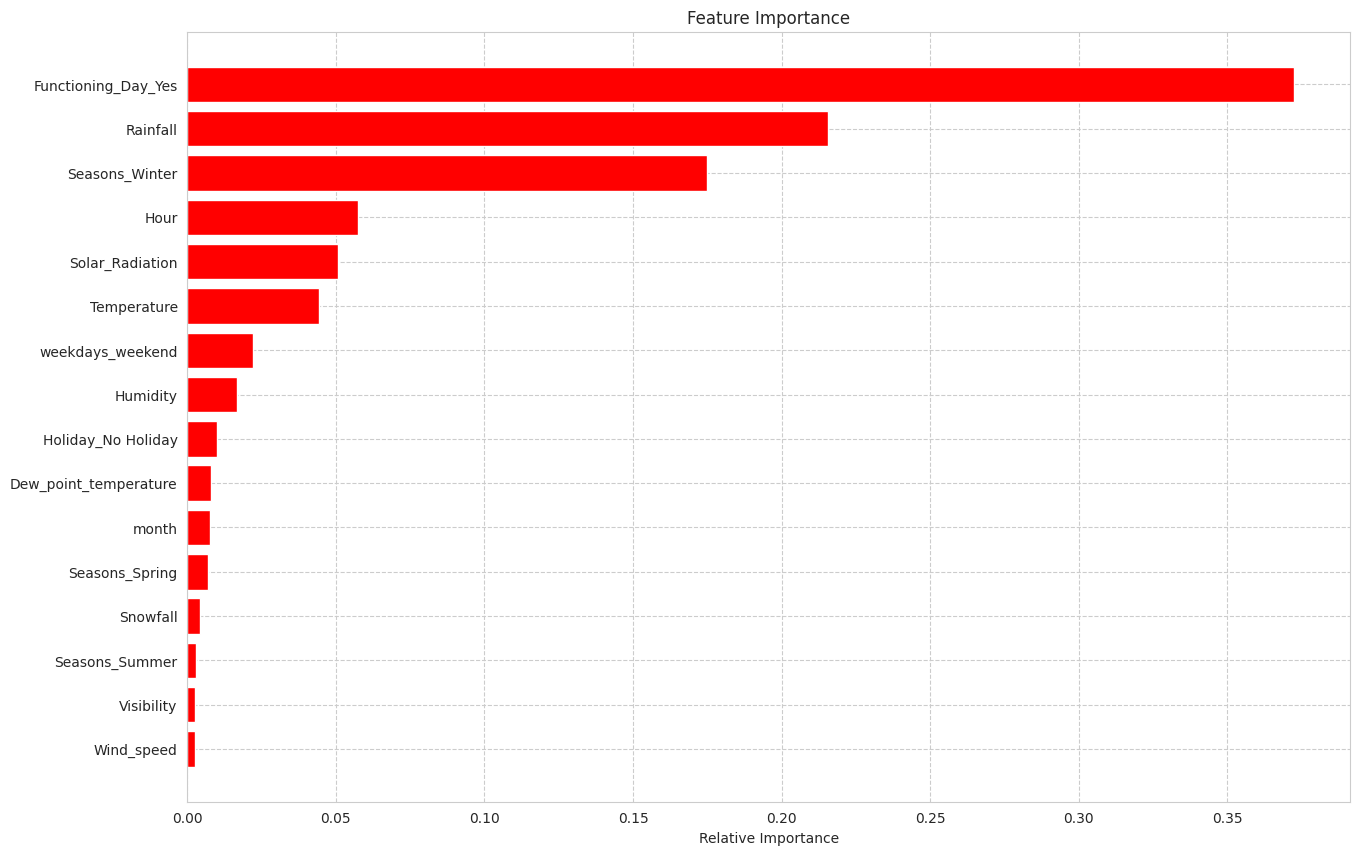

In [ ]:
#getting best param of rf model given by xgb_grid model
get_features_importance(optimal_xgb_model,X_train)

In [ ]:
#CatBoost
#installing catboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.8 MB/s eta 0:00:00


In [ ]:
#importing cat boost Regressor
from catboost import CatBoostRegressor

In [ ]:
# creating Catboost model
cb_model=CatBoostRegressor(verbose=0)


================Evalution Matrix=========================

MSE : 36706.5353729677
RMSE : 191.58949703198164
R2 : 0.910297049908164
Adjusted R2 :  0.9096365587892181

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



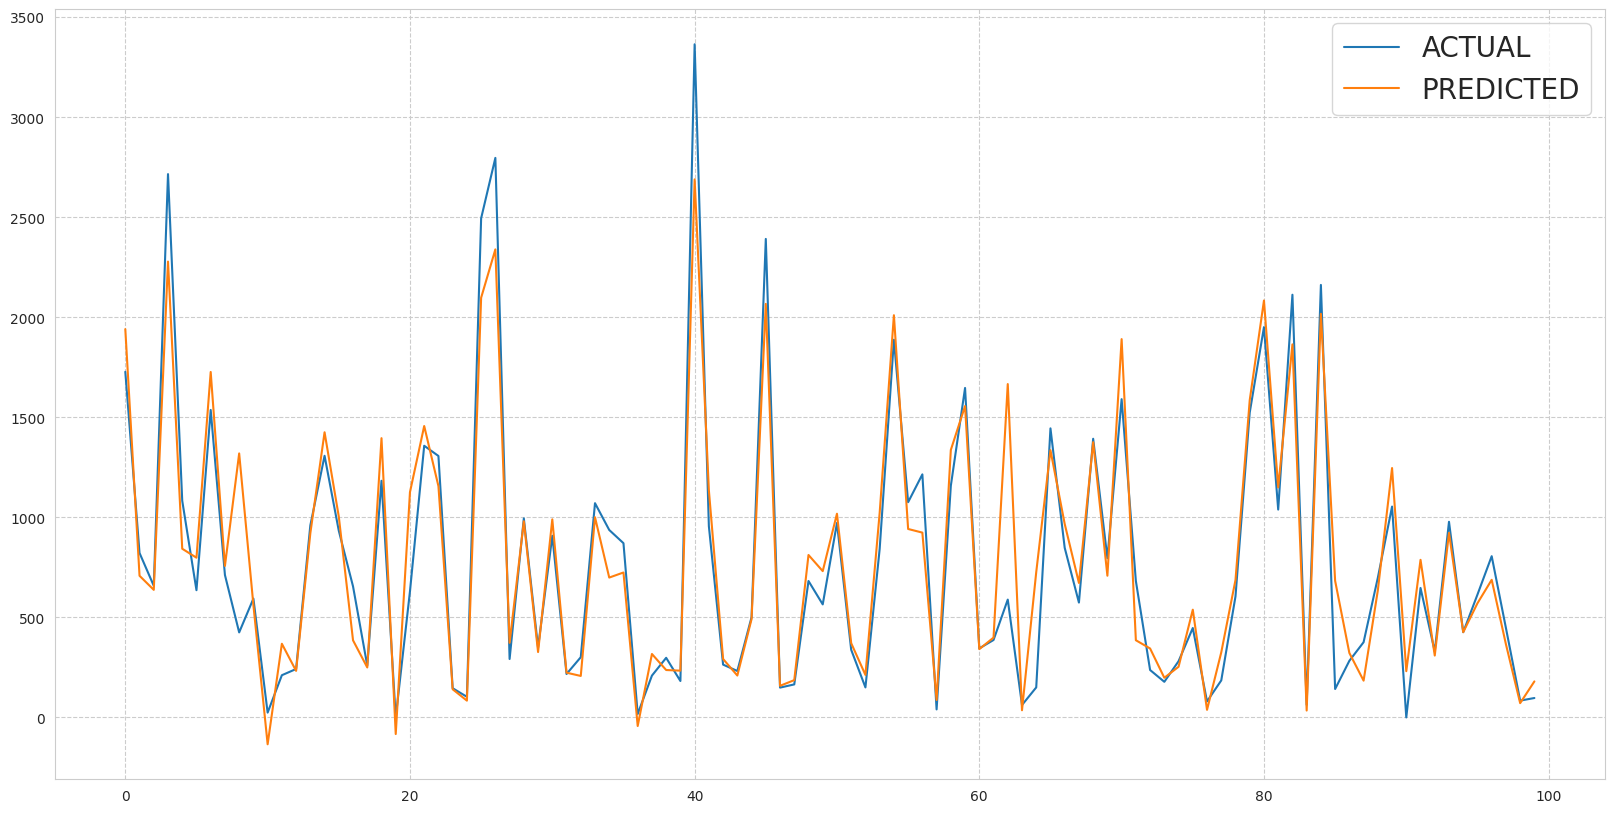

In [ ]:
#calling run_model to train,fit and evalution of catboost model
run_model(cb_model,X_train,y_train,X_test,y_test)

In [ ]:
#checking params of cat boost model
cb_model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'RMSE',
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': True,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'subsample': 0.800000011920929,
 'use_best_model': False,
 'random_seed': 0,
 'depth': 6,
 'posterior_sampling': False,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'RMSE',
 'learning_rate': 0.05512600019574165,
 'score_function': '

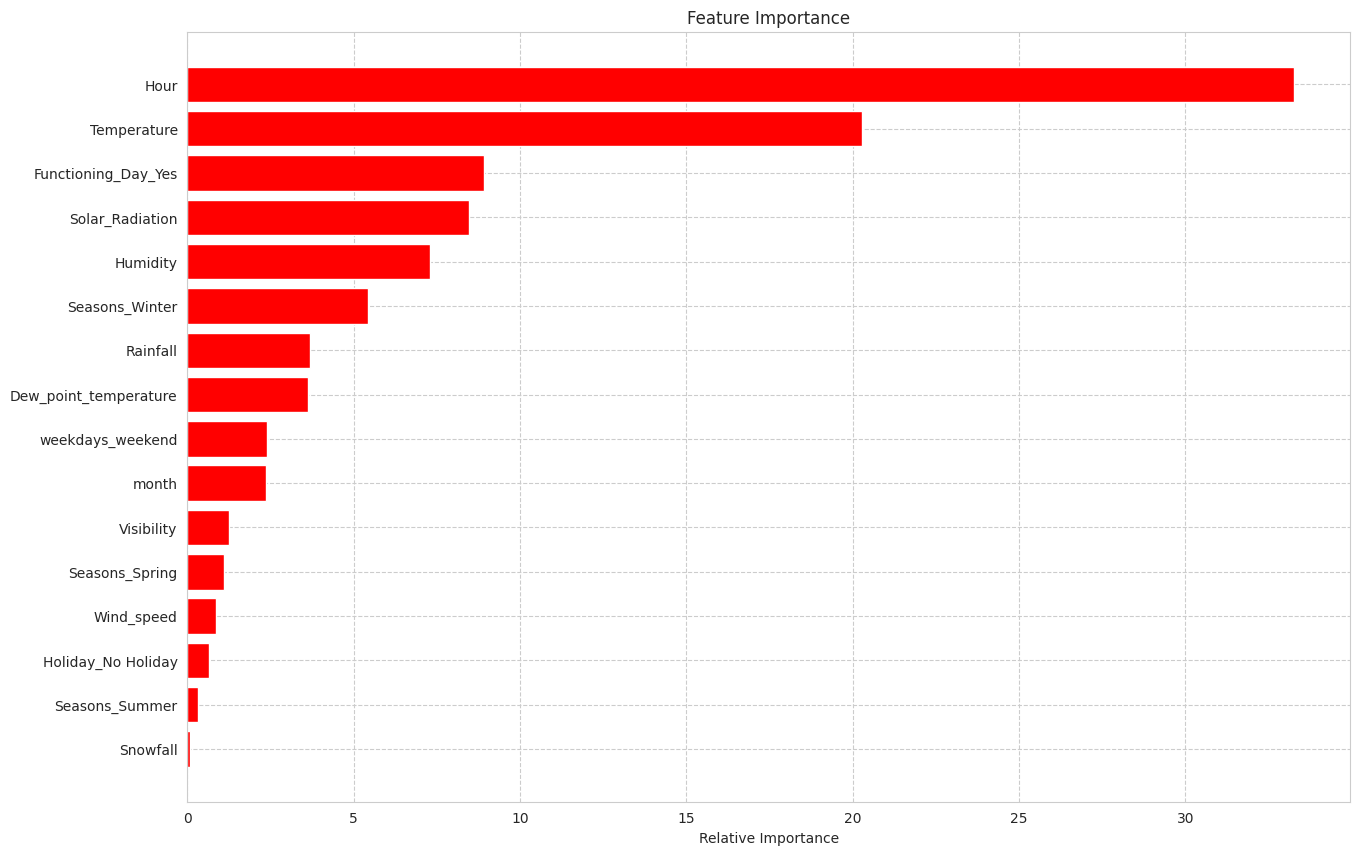

In [ ]:
#getting and visualizing features importance of catboost model
get_features_importance(cb_model,X_train)

In [ ]:
#lightGBM
import lightgbm as lgb


In [ ]:
lgbr=lgb.LGBMRegressor()


In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbr_para={'n_estimators': [150,200,250],'max_depth': [7,10,13]}
lgbr_grid=GridSearchCV(estimator=lgbr,param_grid=lgbr_para,cv=5,scoring='neg_mean_squared_error',verbose=5,n_jobs=-1)

Fitting 5 folds for each of 9 candidates, totalling 45 fits

================Evalution Matrix=========================

MSE : 35410.75375394222
RMSE : 188.17745283094416
R2 : 0.9134636640470446
Adjusted R2 :  0.9128264890009115

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



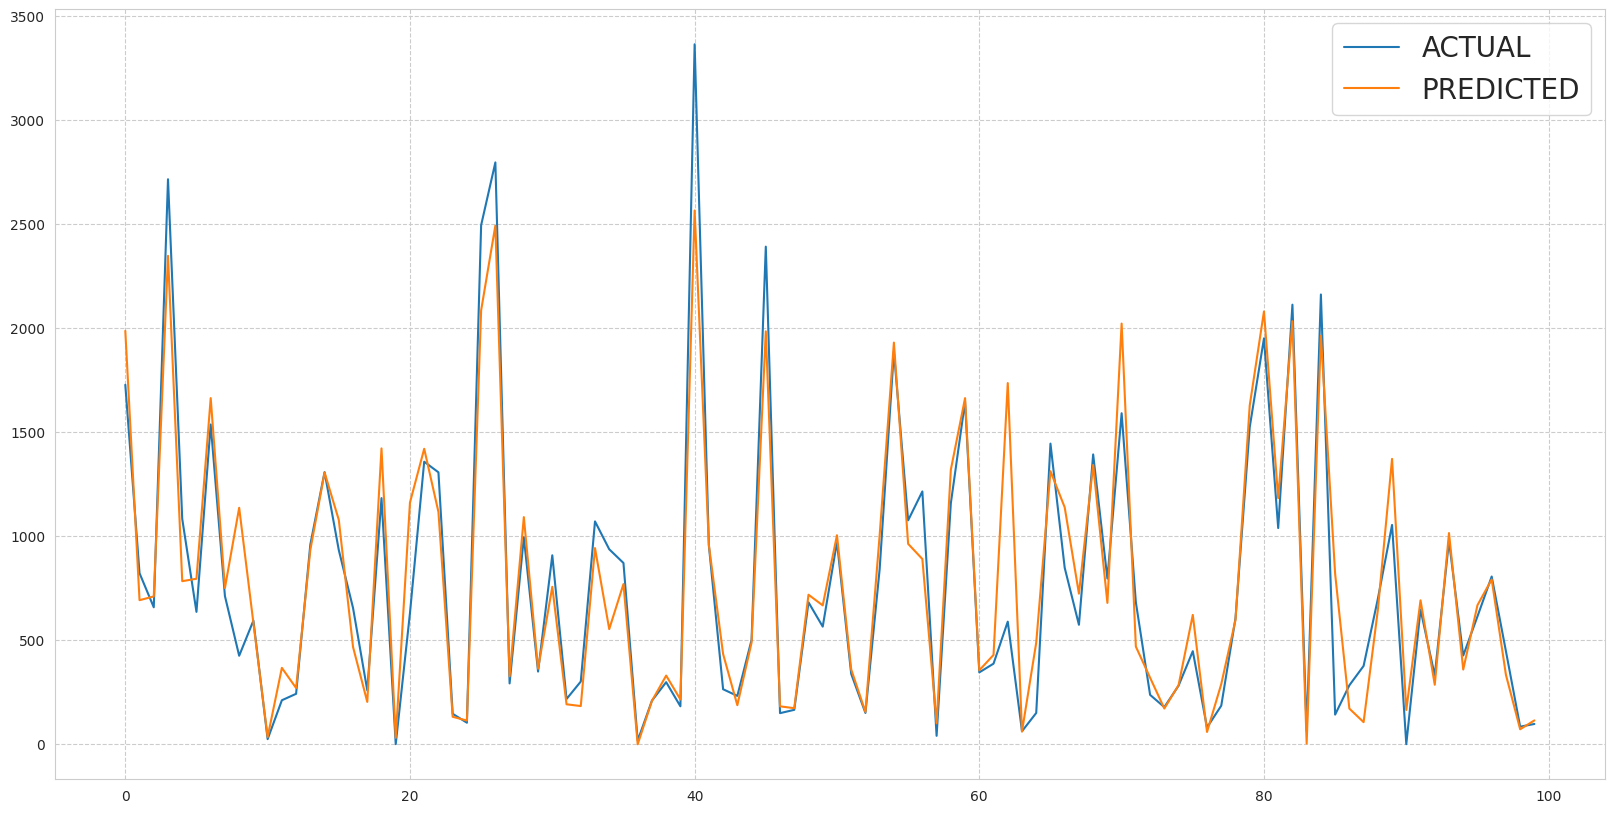

In [ ]:
#calling run_model to train,fit and evalution of catboost model
run_model(lgbr_grid,X_train,y_train,X_test,y_test)

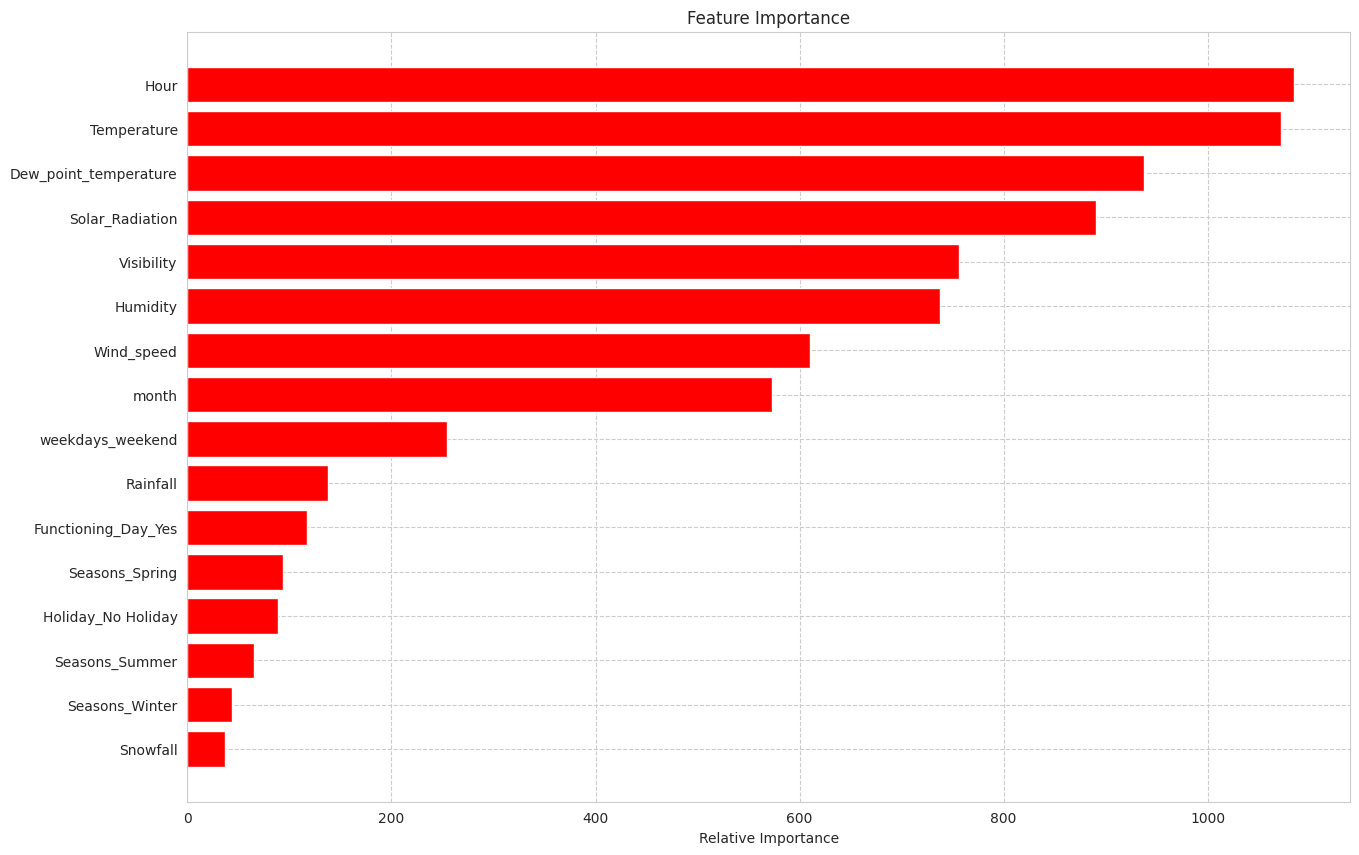

In [ ]:
#getting and visualizing features importance of catboost model
get_features_importance(lgbr_grid.best_estimator_,X_train)

In [ ]:
#Combined Evaluation Matrix of All the models


In [ ]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}


In [ ]:
#list of all model made ,'Gradient_Boosting',,'CATBoost'
model_name=['Linear','Lasso','Ridge','Elasticnet','Polynomial','K-Nearyest_Neighbor','Decision_Tree','Random_Forest','Gradient_Boosting','Xtreme_GB','CATBoost','lightGBM']


In [ ]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index",columns=model_name)

In [ ]:
matrices_df


Linear          Lasso          Ridge  \
Mean_square_error       175590.552873  175560.907118  175248.935066   
Root_Mean_square_error     419.035264     418.999889     418.627442   
R2                           0.572911       0.572983       0.573742   
Adjusted_R2                  0.569766       0.569839       0.570603   

                           Elasticnet     Polynomial  K-Nearyest_Neighbor  \
Mean_square_error       175346.867499  118205.139666         83411.759209   
Root_Mean_square_error     418.744394     343.809743           288.810940   
R2                           0.573504       0.712489             0.796159   
Adjusted_R2                  0.570363       0.710372             0.794659   

                        Decision_Tree  Random_Forest  Gradient_Boosting  \
Mean_square_error        90646.613699   62691.750320       54614.730269   
Root_Mean_square_error     301.075761     250.383207         233.697947   
R2                           0.778479       0.846795           0.866533   
Adjusted_R2                  0.776848       0.845667           0.865551   

                           Xtreme_GB      CATBoost      lightGBM  
Mean_square_error       42764.780412  36706.535373  35410.753754  
Root_Mean_square_error    206.796471    191.589497    188.177453  
R2                          0.895492      0.910297      0.913464  
Adjusted_R2                 0.894722      0.909637      0.912826

In [ ]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [ ]:
final_matrices


Models  Mean_square_error  Root_Mean_square_error        R2  \
0                Linear      175590.552873              419.035264  0.572911   
1                 Lasso      175560.907118              418.999889  0.572983   
2                 Ridge      175248.935066              418.627442  0.573742   
3            Elasticnet      175346.867499              418.744394  0.573504   
4            Polynomial      118205.139666              343.809743  0.712489   
5   K-Nearyest_Neighbor       83411.759209              288.810940  0.796159   
6         Decision_Tree       90646.613699              301.075761  0.778479   
7         Random_Forest       62691.750320              250.383207  0.846795   
8     Gradient_Boosting       54614.730269              233.697947  0.866533   
9             Xtreme_GB       42764.780412              206.796471  0.895492   
10             CATBoost       36706.535373              191.589497  0.910297   
11             lightGBM       35410.753754              188.177453  0.913464   

    Adjusted_R2  
0      0.569766  
1      0.569839  
2      0.570603  
3      0.570363  
4      0.710372  
5      0.794659  
6      0.776848  
7      0.845667  
8      0.865551  
9      0.894722  
10     0.909637  
11     0.912826

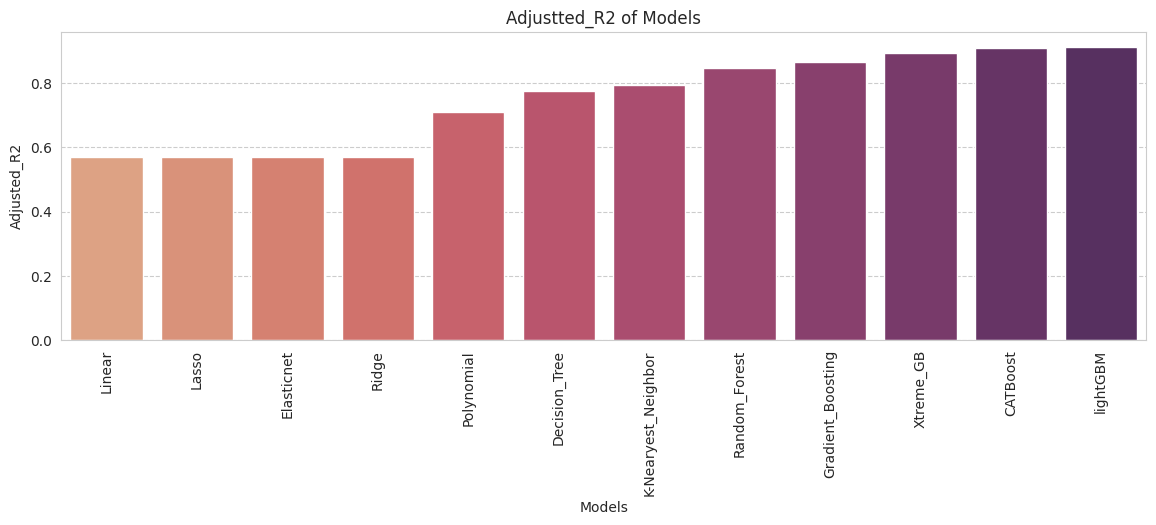

In [ ]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="flare").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

In [ ]:
#Model Explainibility
!pip install shap



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.1 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import export_graphviz
import shap 
sns.set_style('darkgrid')

In [ ]:
for_instance=2


In [ ]:
# shape for xgboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(xgb_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

In [ ]:
#shape for catboost model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(cb_model)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

In [ ]:
#shap for lightGBM model
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(lgbr_grid.best_estimator_)
# obtain shap values for the first row of the test data
shap_values = explainer(X_test,check_additivity=False)
# # visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[for_instance])

In [ ]:
#ELI5
!pip install eli5


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=e95dd78dd376d4cd473743aeff3e054d24e839f78cb7ca97fcb36daffbb83d2c
  Stored in directory: /root/.cache/pip/wheels/7b/26/a5/8460416695a992a2966b41caa5338e5e7fcea98c9d032d055c
Successfully built eli5


In [ ]:
import eli5 as eli
feature_names=list(X_test.columns)
for_instance=2


In [ ]:
#eli5 for xgboost model 
eli.show_prediction(xgb_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)

In [ ]:
#eli5 for lgbr model 
eli.show_prediction(lgbr_grid.best_estimator_, X_test.reset_index(drop=True).loc[[for_instance]],
                    feature_names=feature_names,
                    show_feature_values=True)